
## Time Series GPTs

* Time series data 



## Libraries


In [3]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [5]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [6]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [7]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [8]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [9]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [10]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        ## loss =  (0.1)*loss_SI + Curve_SIMs[0] + Curve_SIMs[1] + Curve_SIMs[2] + Curve_SIMs[3]  
        
        loss =  (0)*loss_SI + Curve_SIMs[3]  
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        history['loss_SIM2'].append( Curve_SIMs[2] )
        history['loss_SIM3'].append( Curve_SIMs[3] )
        history['loss_SIM4'].append( Curve_SIMs[4] )
        history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [11]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  29.814287185668945
seq length of pred =  30
500 train loss =  29.8524227142334
seq length of pred =  30
1000 train loss =  26.406627655029297
seq length of pred =  30
1500 train loss =  28.738248825073242
seq length of pred =  30
2000 train loss =  27.25994873046875
seq length of pred =  30
2500 train loss =  28.482898712158203
seq length of pred =  30


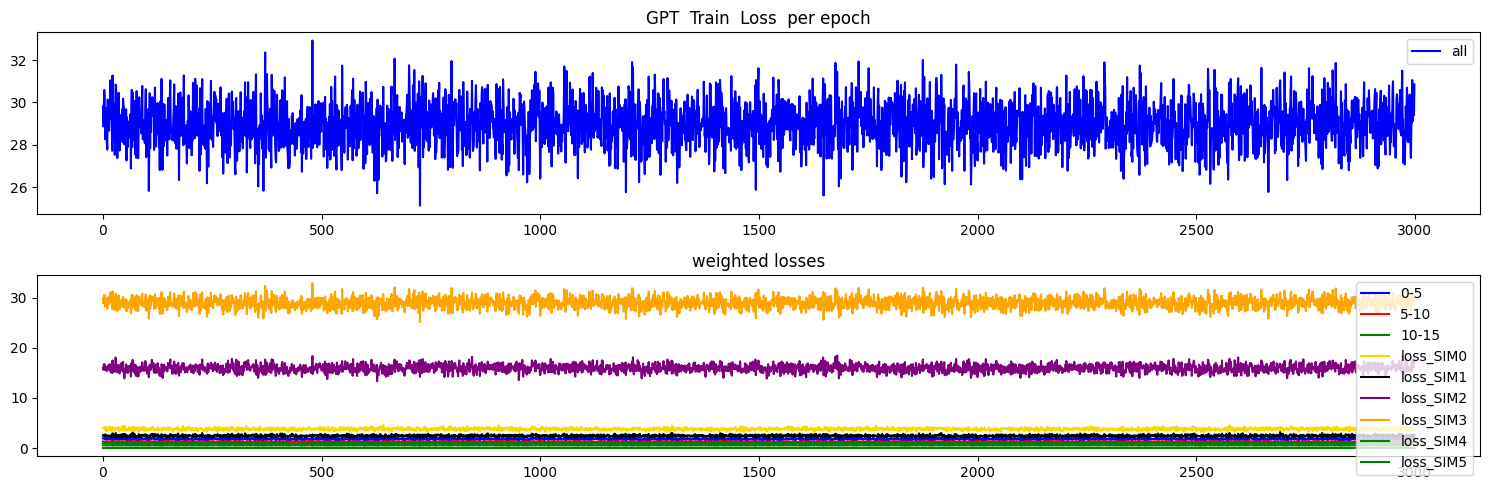

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.051168832927942276
Test MSE Loss - SI only 0-5:  0.04379436746239662
Test MSE Loss - SI only 5-10:  0.04018720984458923
Test MSE Loss - SI only 10-15:  0.1244809627532959
mae, mse, rmse, mape, mspe, rse, corr
(0.19236541, 0.051168833, 0.22620529, 12.527428, 1812.3685, 1.2688332)
Testing R**2 - SI only:  -0.6099377669286856
Testing R**2 - SI only:  -0.6099377669286856
Testing R**2 - All features:  0.9612530820394867
Testing R**2 - (f2) - SI full:  0.303466207279078


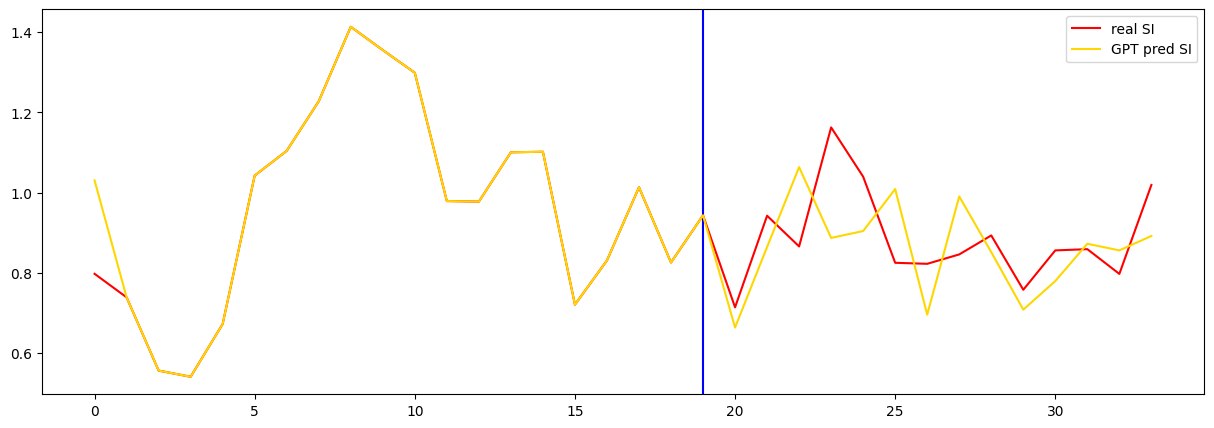

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  24.750896453857422
seq length of pred =  30
500 train loss =  24.972190856933594
seq length of pred =  30
1000 train loss =  23.794464111328125
seq length of pred =  30
1500 train loss =  25.44044303894043
seq length of pred =  30
2000 train loss =  24.62118911743164
seq length of pred =  30
2500 train loss =  22.353168487548828
seq length of pred =  30


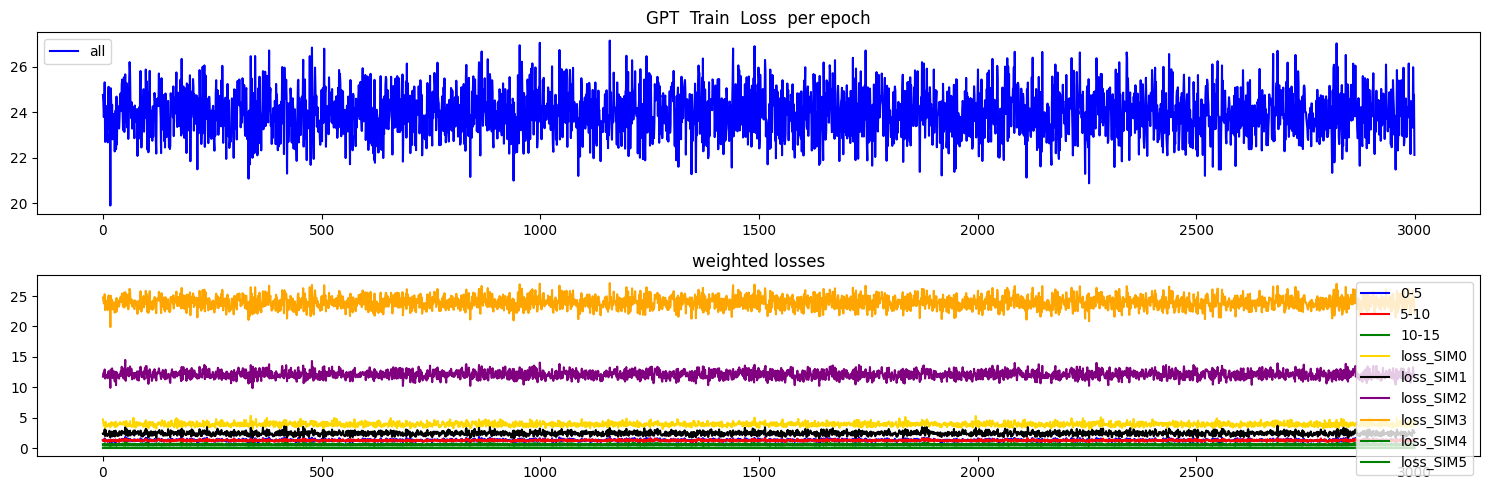

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05821710824966431
Test MSE Loss - SI only 0-5:  0.043794356286525726
Test MSE Loss - SI only 5-10:  0.04018720984458923
Test MSE Loss - SI only 10-15:  0.1244809478521347
mae, mse, rmse, mape, mspe, rse, corr
(0.20749384, 0.05821711, 0.24128221, 13.647258, 1881.148, 1.3534031)
Testing R**2 - SI only:  -0.8316994573525931
Testing R**2 - SI only:  -0.8316994573525931
Testing R**2 - All features:  0.9626673635063547
Testing R**2 - (f2) - SI full:  0.16432248202373112


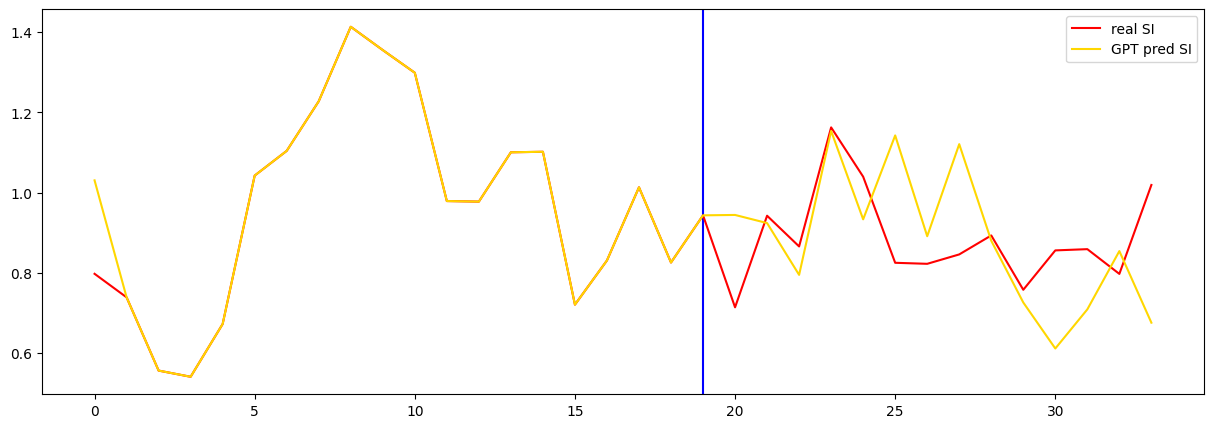

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.13826560974121
seq length of pred =  30
500 train loss =  24.465707778930664
seq length of pred =  30
1000 train loss =  24.075794219970703
seq length of pred =  30
1500 train loss =  25.03481101989746
seq length of pred =  30
2000 train loss =  22.46050453186035
seq length of pred =  30
2500 train loss =  24.261560440063477
seq length of pred =  30


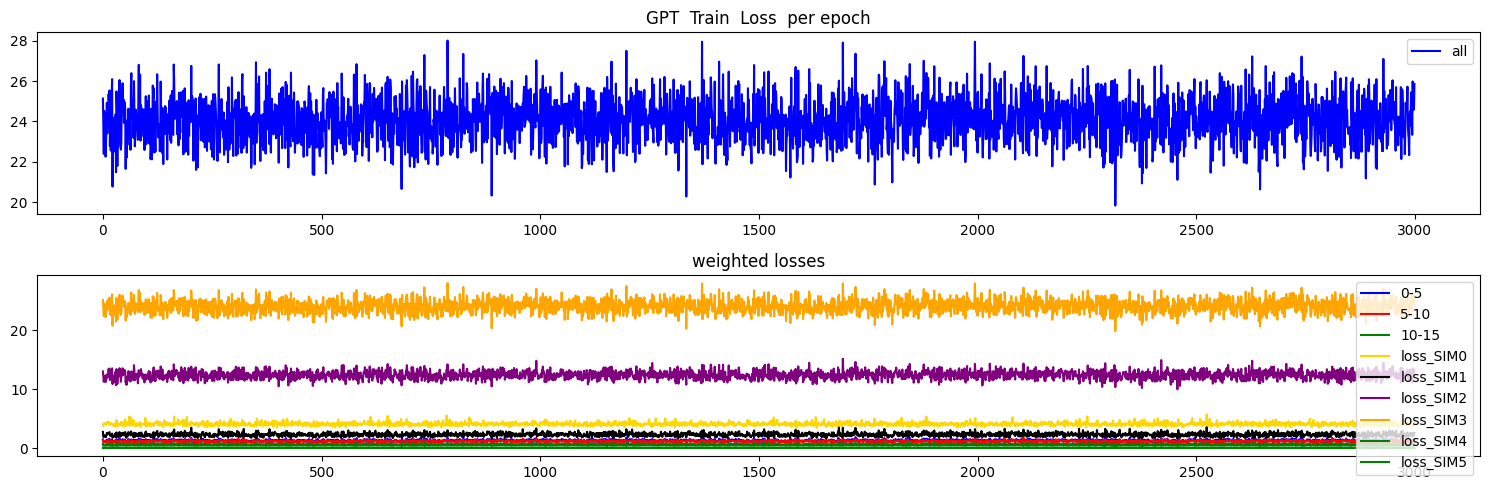

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04974807798862457
Test MSE Loss - SI only 0-5:  0.043794360011816025
Test MSE Loss - SI only 5-10:  0.04018721356987953
Test MSE Loss - SI only 10-15:  0.1244809627532959
mae, mse, rmse, mape, mspe, rse, corr
(0.18430237, 0.049748074, 0.22304276, 13.380777, 1873.3961, 1.2510941)
Testing R**2 - SI only:  -0.5652360301837993
Testing R**2 - SI only:  -0.5652360301837993
Testing R**2 - All features:  0.9652280256741828
Testing R**2 - (f2) - SI full:  0.21290853513772823


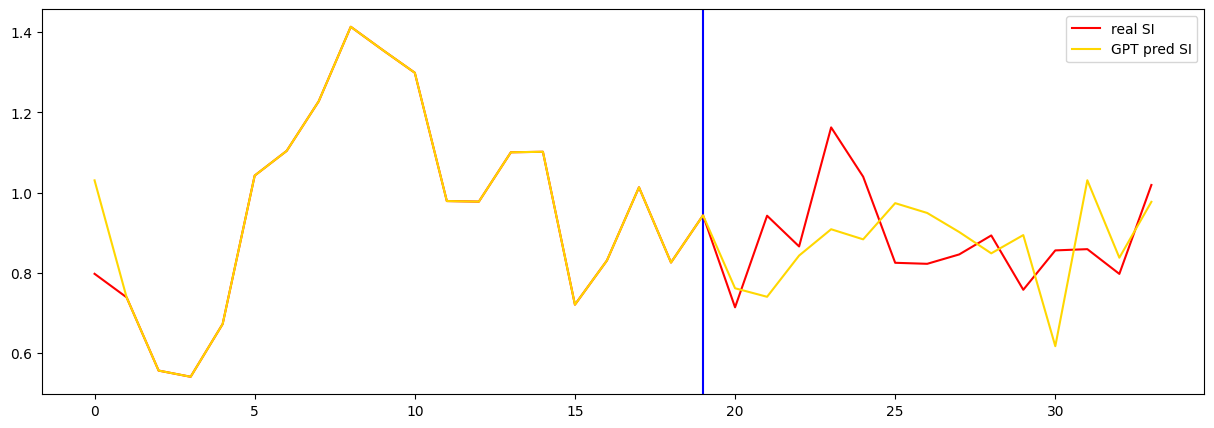

In [14]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  20.945703506469727
seq length of pred =  30
500 train loss =  22.75715446472168
seq length of pred =  30
1000 train loss =  22.517866134643555
seq length of pred =  30
1500 train loss =  25.558696746826172
seq length of pred =  30
2000 train loss =  21.950809478759766
seq length of pred =  30
2500 train loss =  20.83917999267578
seq length of pred =  30


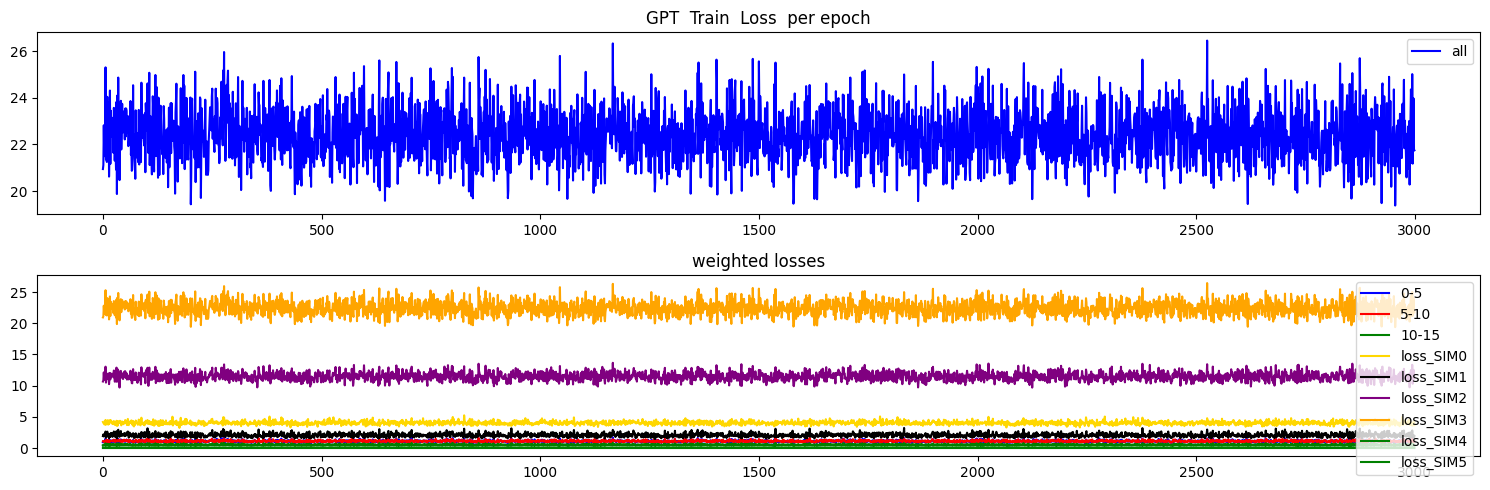

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05715733394026756
Test MSE Loss - SI only 0-5:  0.043794360011816025
Test MSE Loss - SI only 5-10:  0.04018721356987953
Test MSE Loss - SI only 10-15:  0.12448094040155411
mae, mse, rmse, mape, mspe, rse, corr
(0.20264837, 0.057157334, 0.239076, 13.679218, 1894.2626, 1.3410279)
Testing R**2 - SI only:  -0.7983554696928119
Testing R**2 - SI only:  -0.7983554696928119
Testing R**2 - All features:  0.9604022360164686
Testing R**2 - (f2) - SI full:  0.32366311713905405


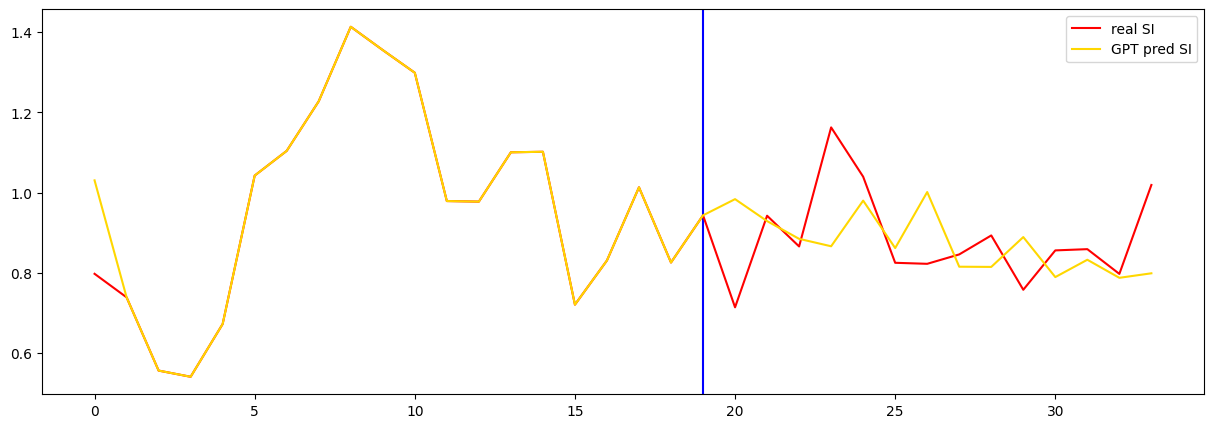

In [15]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [16]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  29.20709800720215
seq length of pred =  30
500 train loss =  29.594181060791016
seq length of pred =  30
1000 train loss =  29.647619247436523
seq length of pred =  30
1500 train loss =  29.17793846130371
seq length of pred =  30
2000 train loss =  29.02560806274414
seq length of pred =  30
2500 train loss =  28.53526496887207
seq length of pred =  30


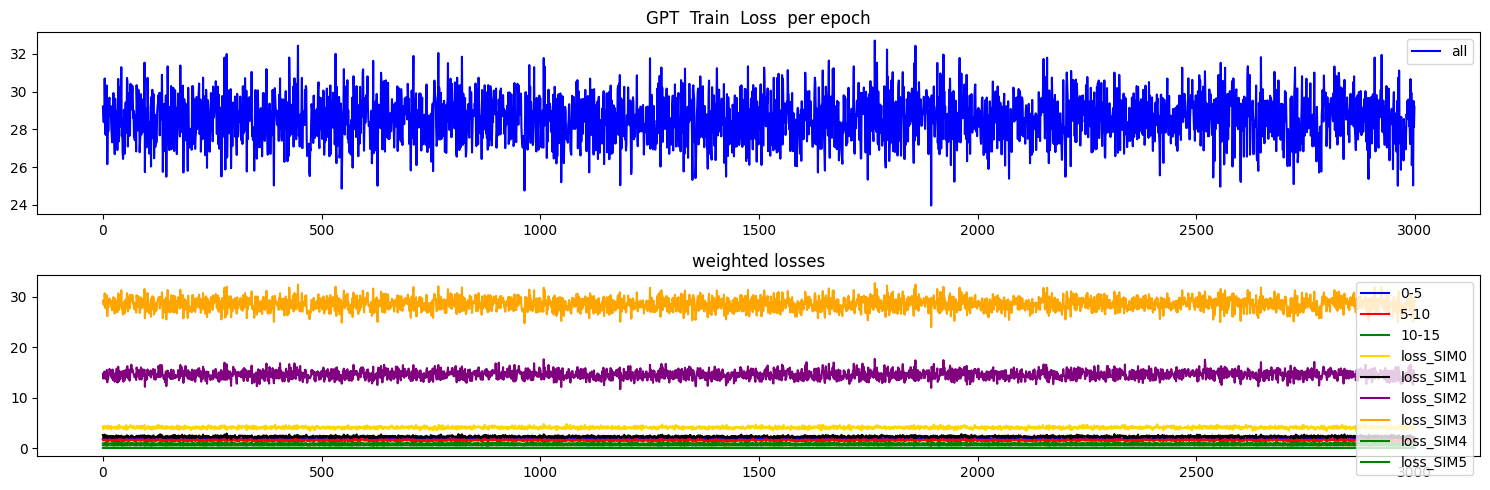

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.044033363461494446
Test MSE Loss - SI only 0-5:  0.033362481743097305
Test MSE Loss - SI only 5-10:  0.031982507556676865
Test MSE Loss - SI only 10-15:  0.1538899689912796
mae, mse, rmse, mape, mspe, rse, corr
(0.1633219, 0.044033363, 0.20984128, 2.525077, 19.063766, 1.3709449)
Testing R**2 - SI only:  -0.8794894686051169
Testing R**2 - SI only:  -0.8794894686051169
Testing R**2 - All features:  0.9670617767071951
Testing R**2 - (f2) - SI full:  0.11005400906275065


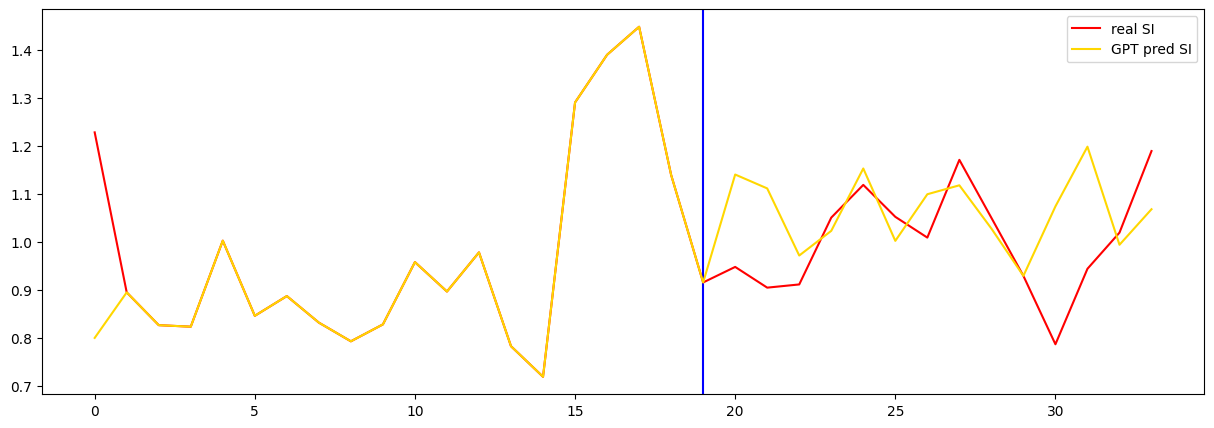

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  28.028051376342773
seq length of pred =  30
500 train loss =  27.39208221435547
seq length of pred =  30
1000 train loss =  26.97878646850586
seq length of pred =  30
1500 train loss =  26.90616226196289
seq length of pred =  30
2000 train loss =  29.781978607177734
seq length of pred =  30
2500 train loss =  27.610252380371094
seq length of pred =  30


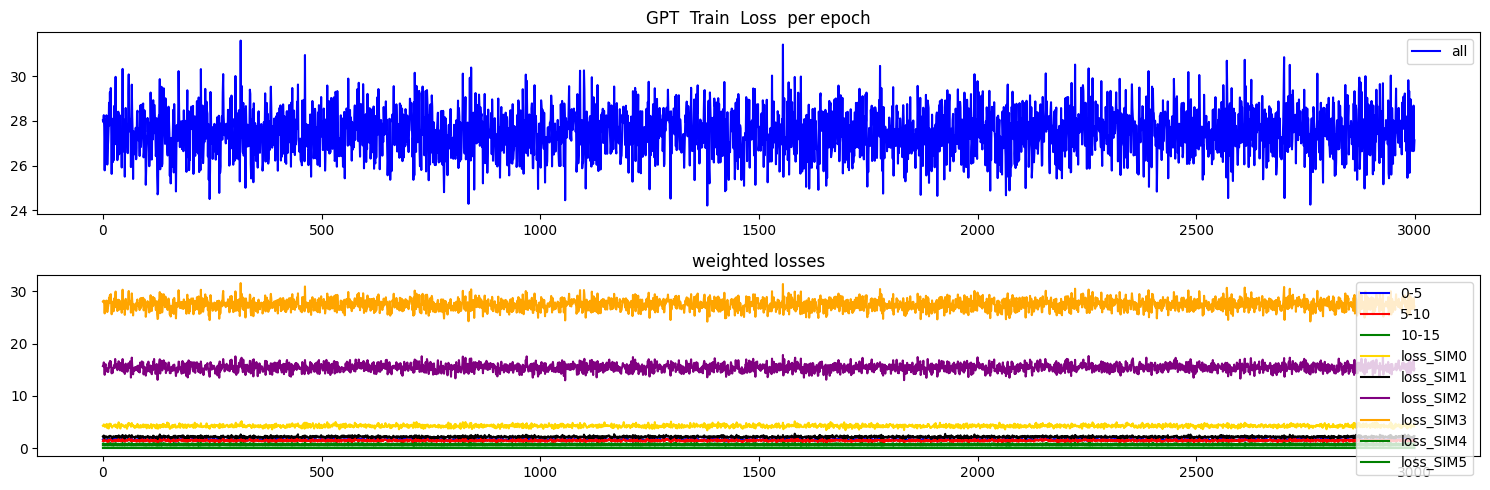

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04927562549710274
Test MSE Loss - SI only 0-5:  0.033362481743097305
Test MSE Loss - SI only 5-10:  0.031982507556676865
Test MSE Loss - SI only 10-15:  0.1538899689912796
mae, mse, rmse, mape, mspe, rse, corr
(0.17870465, 0.049275625, 0.22198114, 2.8769355, 24.605734, 1.4502575)
Testing R**2 - SI only:  -1.103246864140016
Testing R**2 - SI only:  -1.103246864140016
Testing R**2 - All features:  0.9770771423236431
Testing R**2 - (f2) - SI full:  0.05617382768997203


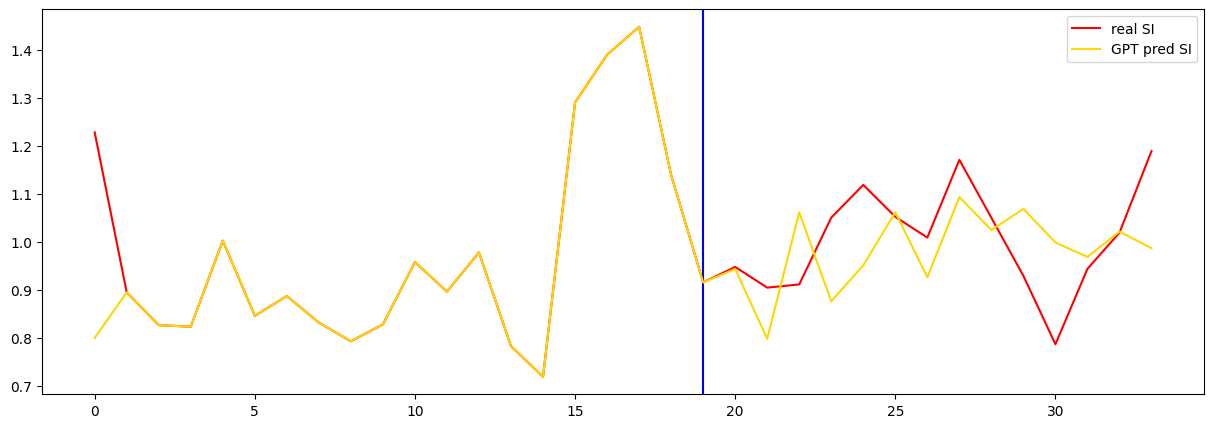

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  26.432302474975586
seq length of pred =  30
500 train loss =  28.283451080322266
seq length of pred =  30
1000 train loss =  27.891035079956055
seq length of pred =  30
1500 train loss =  26.447357177734375
seq length of pred =  30
2000 train loss =  27.93086051940918
seq length of pred =  30
2500 train loss =  27.316987991333008
seq length of pred =  30


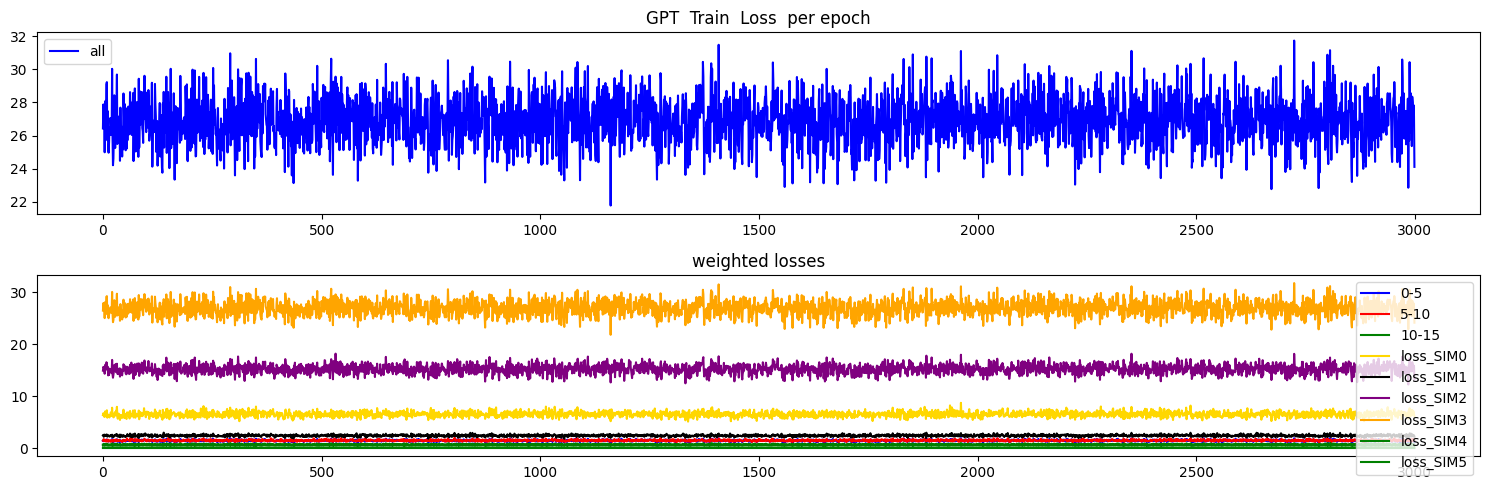

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04272908717393875
Test MSE Loss - SI only 0-5:  0.033362481743097305
Test MSE Loss - SI only 5-10:  0.031982507556676865
Test MSE Loss - SI only 10-15:  0.1538899689912796
mae, mse, rmse, mape, mspe, rse, corr
(0.16055994, 0.042729087, 0.20671016, 2.4705174, 18.644455, 1.3504884)
Testing R**2 - SI only:  -0.8238187086559476
Testing R**2 - SI only:  -0.8238187086559476
Testing R**2 - All features:  0.9691392236408666
Testing R**2 - (f2) - SI full:  0.06855621047458915


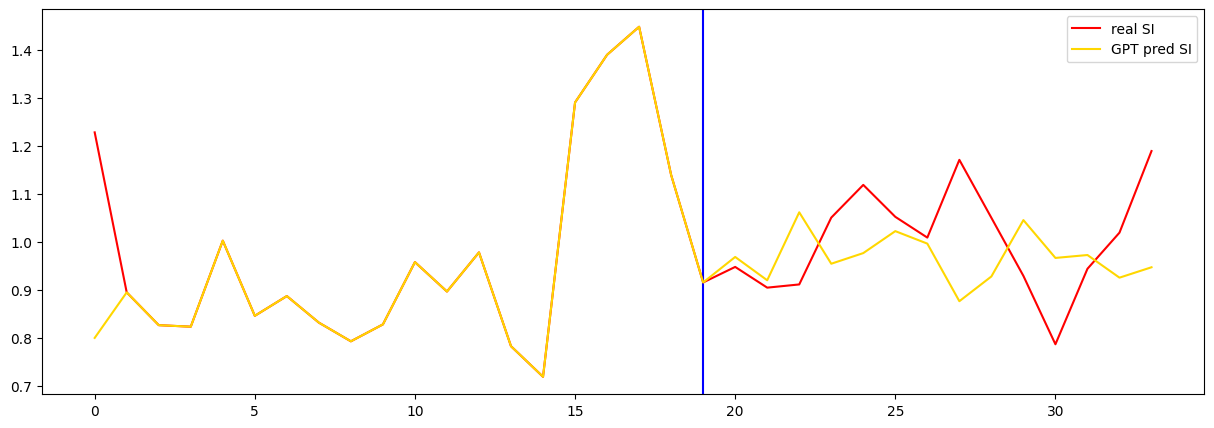

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.349130630493164
seq length of pred =  30
500 train loss =  22.659685134887695
seq length of pred =  30
1000 train loss =  22.848634719848633
seq length of pred =  30
1500 train loss =  24.765209197998047
seq length of pred =  30
2000 train loss =  21.95379066467285
seq length of pred =  30
2500 train loss =  23.3475284576416
seq length of pred =  30


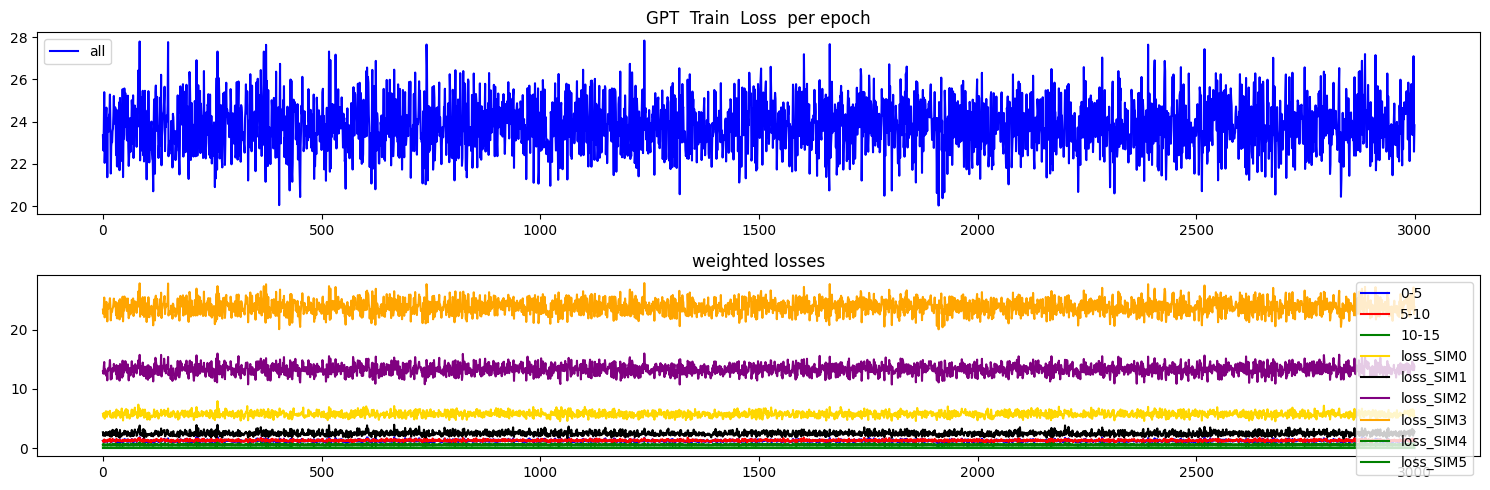

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04912358149886131
Test MSE Loss - SI only 0-5:  0.033362481743097305
Test MSE Loss - SI only 5-10:  0.031982507556676865
Test MSE Loss - SI only 10-15:  0.1538899689912796
mae, mse, rmse, mape, mspe, rse, corr
(0.17420688, 0.049123585, 0.22163841, 2.6130292, 19.99569, 1.4480184)
Testing R**2 - SI only:  -1.096756950298937
Testing R**2 - SI only:  -1.096756950298937
Testing R**2 - All features:  0.9742476761175022
Testing R**2 - (f2) - SI full:  0.09293555392786734


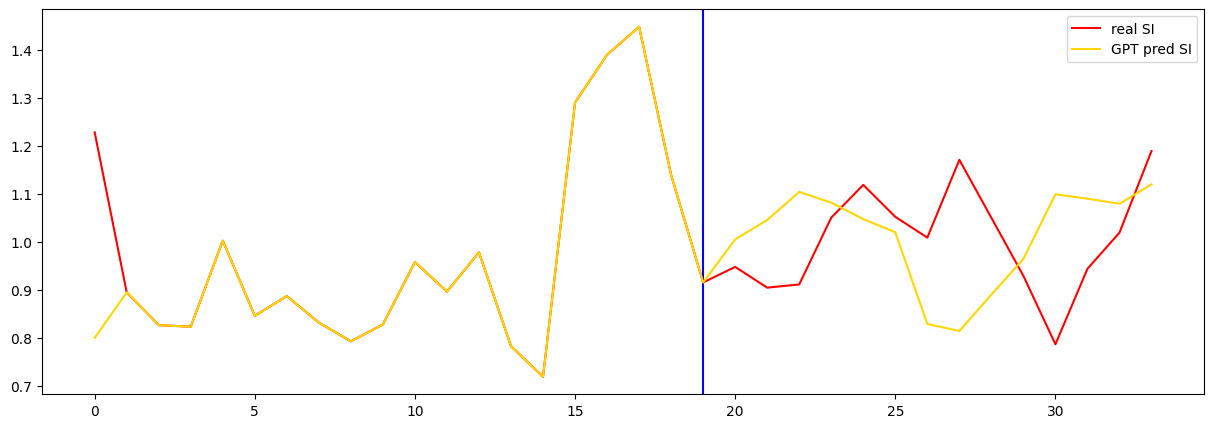

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [21]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  25.788108825683594
seq length of pred =  30
500 train loss =  26.62116050720215
seq length of pred =  30
1000 train loss =  26.514678955078125
seq length of pred =  30
1500 train loss =  26.196739196777344
seq length of pred =  30
2000 train loss =  26.33366584777832
seq length of pred =  30
2500 train loss =  25.76106071472168
seq length of pred =  30


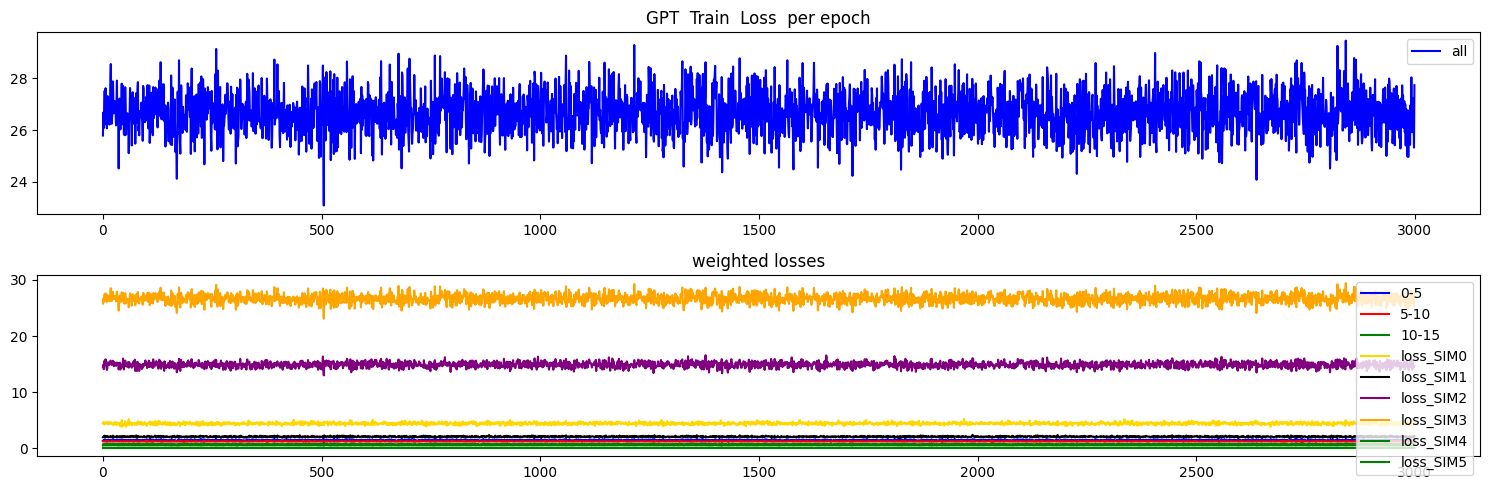

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.16488605737686157
Test MSE Loss - SI only 0-5:  0.1250389814376831
Test MSE Loss - SI only 5-10:  0.19023948907852173
Test MSE Loss - SI only 10-15:  0.3952716290950775
mae, mse, rmse, mape, mspe, rse, corr
(0.3135701, 0.16488604, 0.40606162, 3.6520019, 44.318665, 1.3341306)
Testing R**2 - SI only:  -0.7799045596984702
Testing R**2 - SI only:  -0.7799045596984702
Testing R**2 - All features:  0.9698607394294657
Testing R**2 - (f2) - SI full:  0.5606235777779023


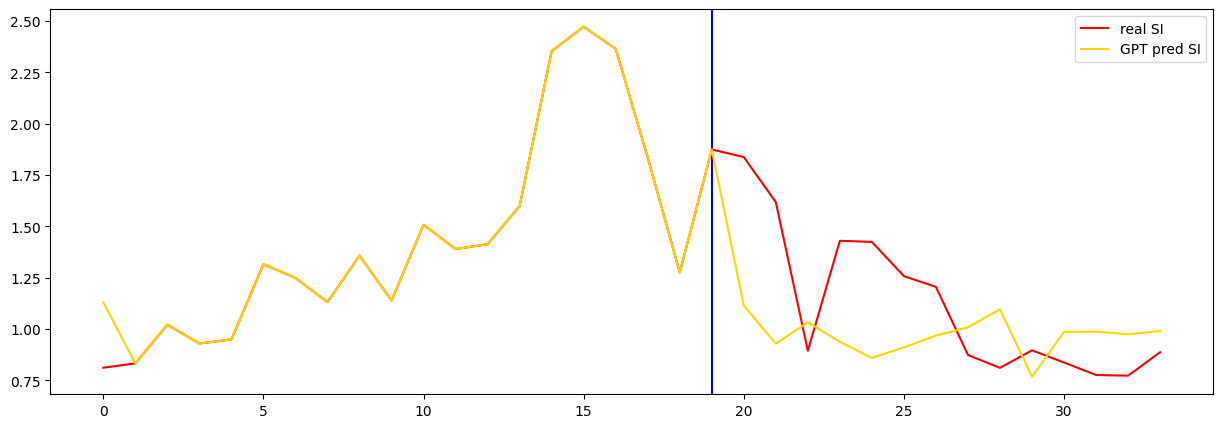

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  26.88828468322754
seq length of pred =  30
500 train loss =  24.455915451049805
seq length of pred =  30
1000 train loss =  28.702362060546875
seq length of pred =  30
1500 train loss =  26.893922805786133
seq length of pred =  30
2000 train loss =  27.440292358398438
seq length of pred =  30
2500 train loss =  26.235822677612305
seq length of pred =  30


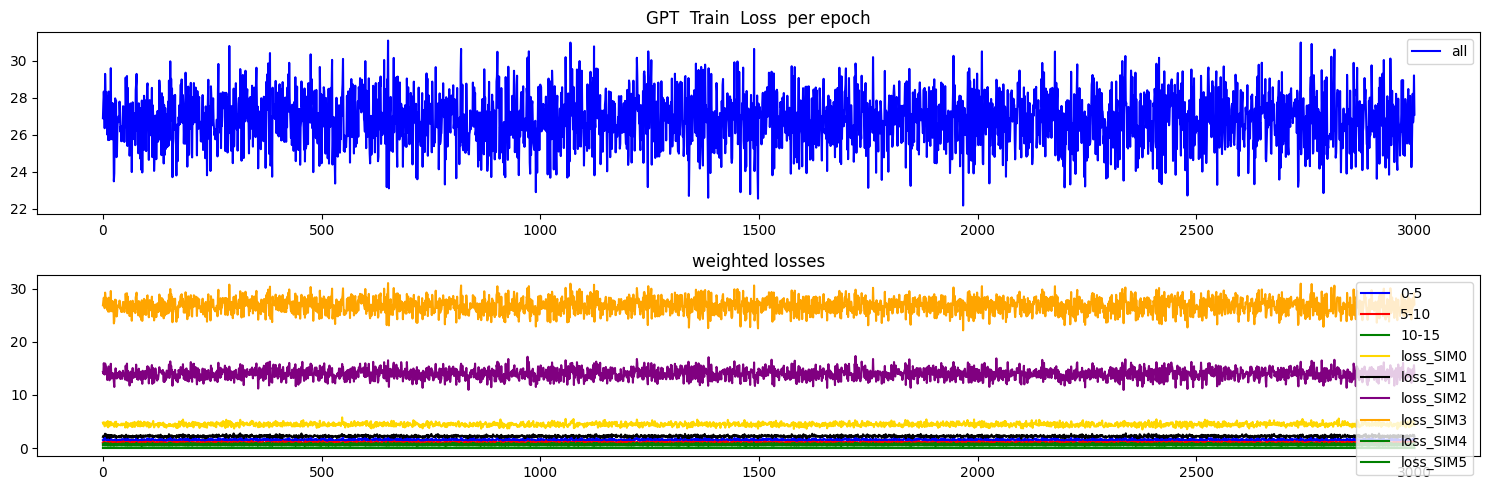

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.16461050510406494
Test MSE Loss - SI only 0-5:  0.1250389814376831
Test MSE Loss - SI only 5-10:  0.19023948907852173
Test MSE Loss - SI only 10-15:  0.3952716290950775
mae, mse, rmse, mape, mspe, rse, corr
(0.31182384, 0.16461052, 0.40572223, 4.884449, 134.8903, 1.3330154)
Testing R**2 - SI only:  -0.7769302530612736
Testing R**2 - SI only:  -0.7769302530612736
Testing R**2 - All features:  0.9425165615760062
Testing R**2 - (f2) - SI full:  0.5211054496949613


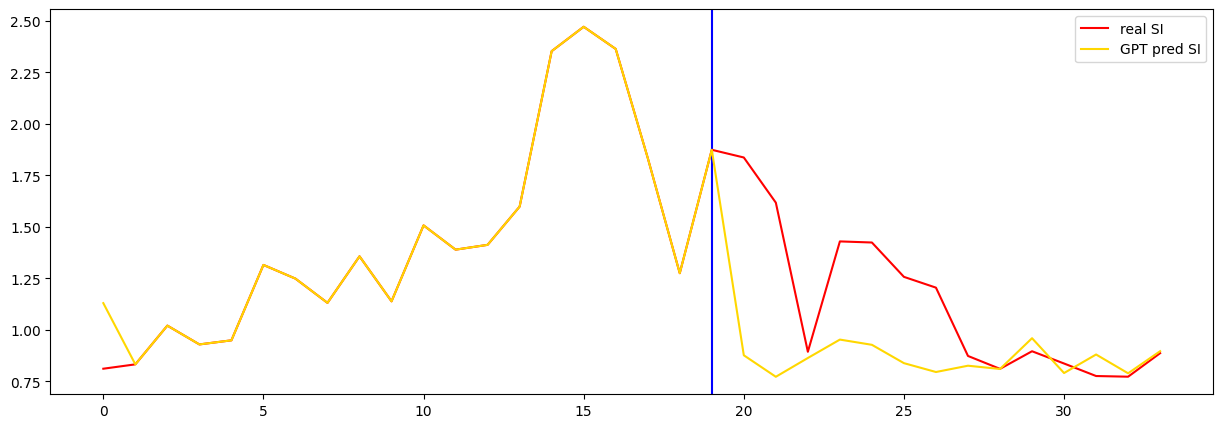

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.448331832885742
seq length of pred =  30
500 train loss =  22.052448272705078
seq length of pred =  30
1000 train loss =  25.474639892578125
seq length of pred =  30
1500 train loss =  24.19584083557129
seq length of pred =  30
2000 train loss =  22.750587463378906
seq length of pred =  30
2500 train loss =  24.421762466430664
seq length of pred =  30


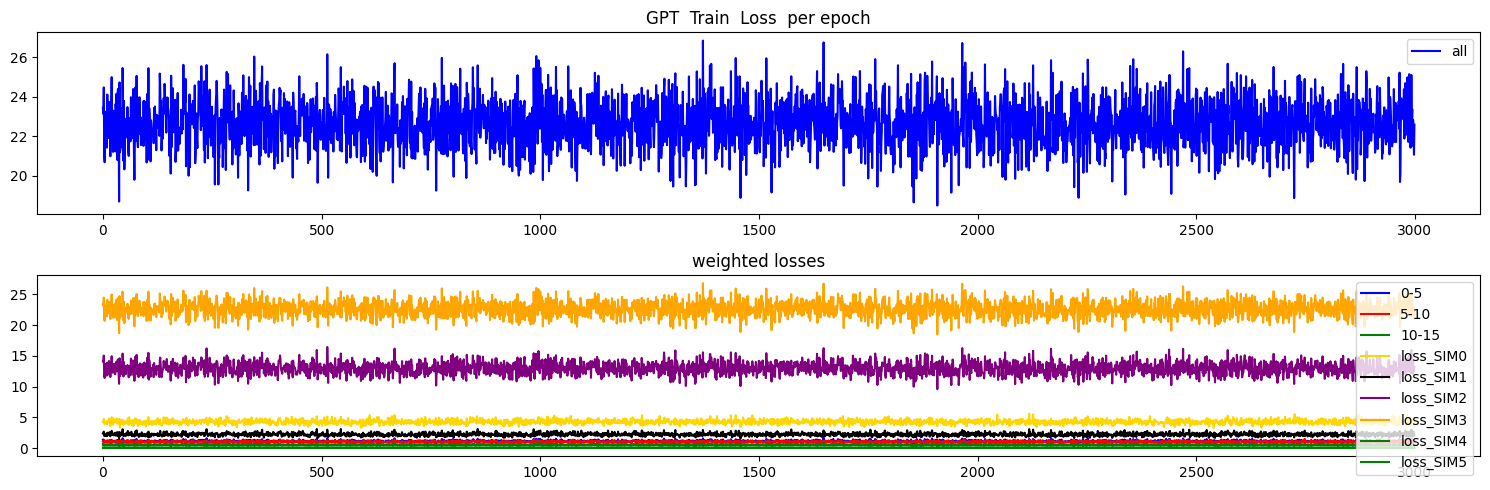

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.15834173560142517
Test MSE Loss - SI only 0-5:  0.1250389814376831
Test MSE Loss - SI only 5-10:  0.19023948907852173
Test MSE Loss - SI only 10-15:  0.3952716290950775
mae, mse, rmse, mape, mspe, rse, corr
(0.31043923, 0.15834174, 0.39792177, 5.4550304, 207.82927, 1.3073869)
Testing R**2 - SI only:  -0.7092603489609062
Testing R**2 - SI only:  -0.7092603489609062
Testing R**2 - All features:  0.956981051112312
Testing R**2 - (f2) - SI full:  0.536946223055727


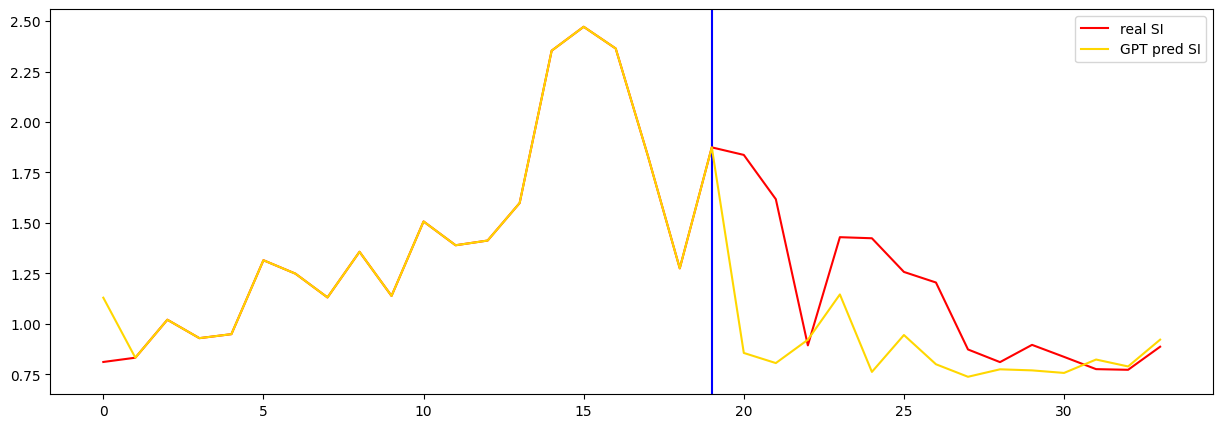

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.026409149169922
seq length of pred =  30
500 train loss =  22.91283416748047
seq length of pred =  30
1000 train loss =  26.99501609802246
seq length of pred =  30
1500 train loss =  22.26348876953125
seq length of pred =  30
2000 train loss =  23.46795654296875
seq length of pred =  30
2500 train loss =  25.85346221923828
seq length of pred =  30


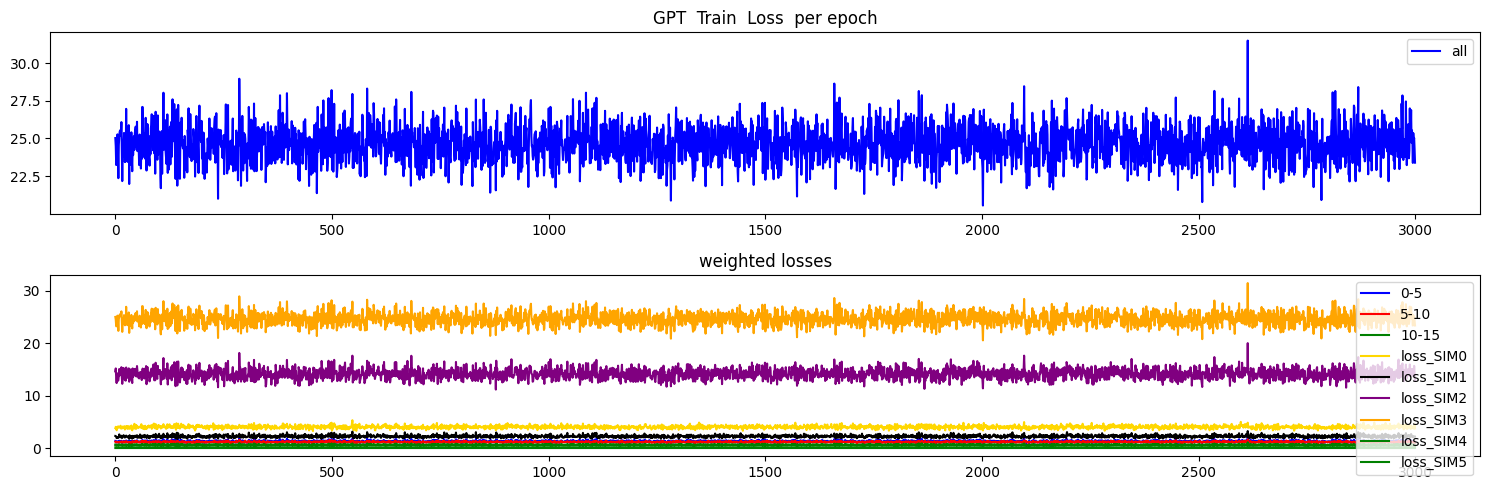

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.15616817772388458
Test MSE Loss - SI only 0-5:  0.1250389814376831
Test MSE Loss - SI only 5-10:  0.19023948907852173
Test MSE Loss - SI only 10-15:  0.3952716290950775
mae, mse, rmse, mape, mspe, rse, corr
(0.3020717, 0.15616816, 0.39518118, 3.581939, 48.671215, 1.2983825)
Testing R**2 - SI only:  -0.6857972949142939
Testing R**2 - SI only:  -0.6857972949142939
Testing R**2 - All features:  0.9703490253393808
Testing R**2 - (f2) - SI full:  0.4923091644829103


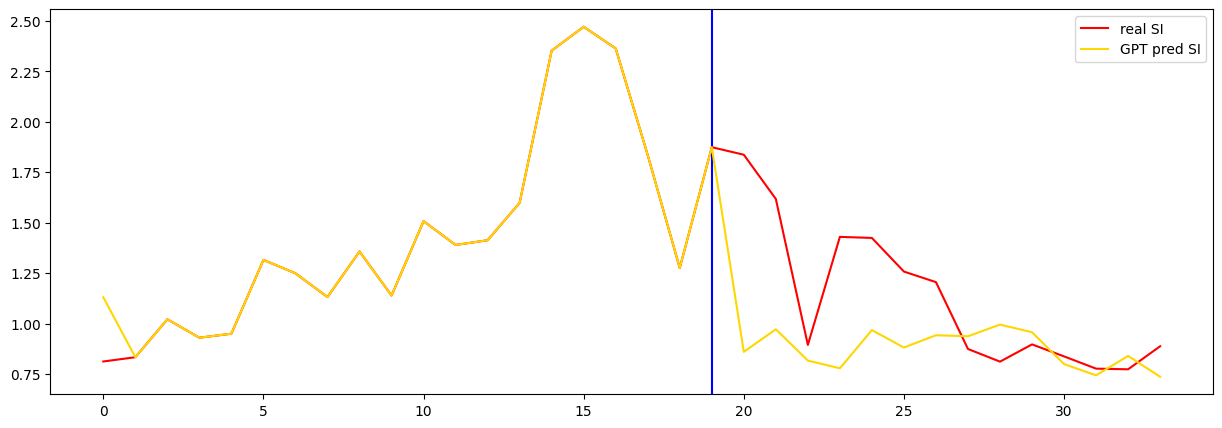

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [26]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  25.132827758789062
seq length of pred =  30
500 train loss =  21.580549240112305
seq length of pred =  30
1000 train loss =  23.668336868286133
seq length of pred =  30
1500 train loss =  24.244102478027344
seq length of pred =  30
2000 train loss =  21.95722198486328
seq length of pred =  30
2500 train loss =  24.756046295166016
seq length of pred =  30


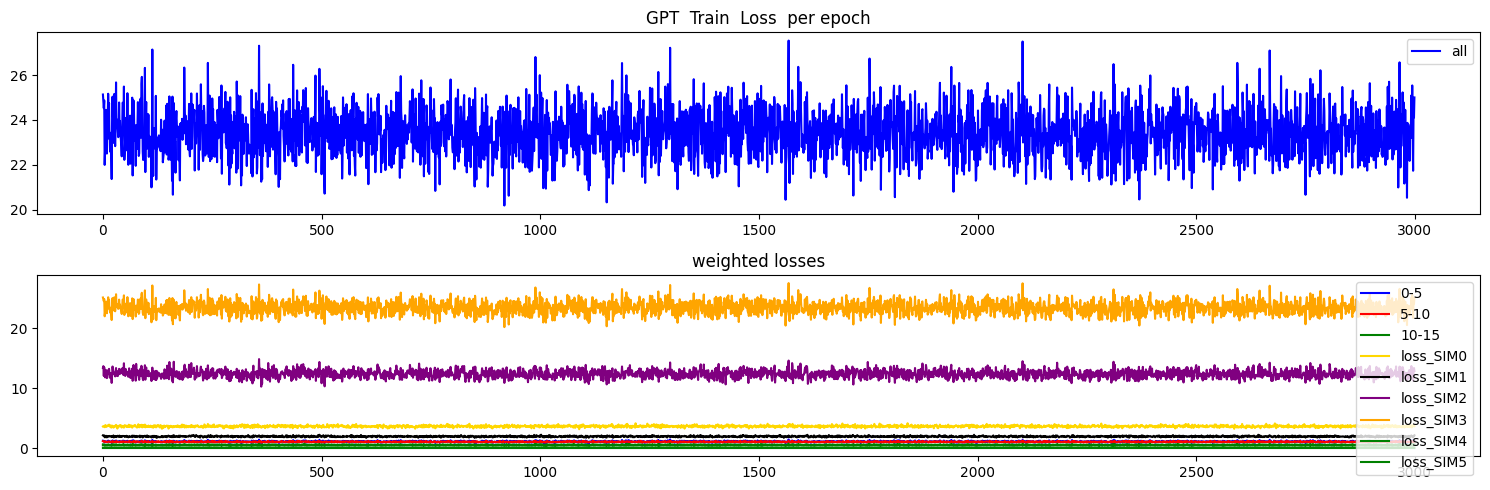

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.032350607216358185
Test MSE Loss - SI only 0-5:  0.03810262680053711
Test MSE Loss - SI only 5-10:  0.03079569898545742
Test MSE Loss - SI only 10-15:  0.008459025993943214
mae, mse, rmse, mape, mspe, rse, corr
(0.1426618, 0.032350607, 0.17986275, 1.6813459, 4.1522803, 1.5022973)
Testing R**2 - SI only:  -1.2568970991637731
Testing R**2 - SI only:  -1.2568970991637731
Testing R**2 - All features:  0.9844616544596397
Testing R**2 - (f2) - SI full:  -1.6433953677604207


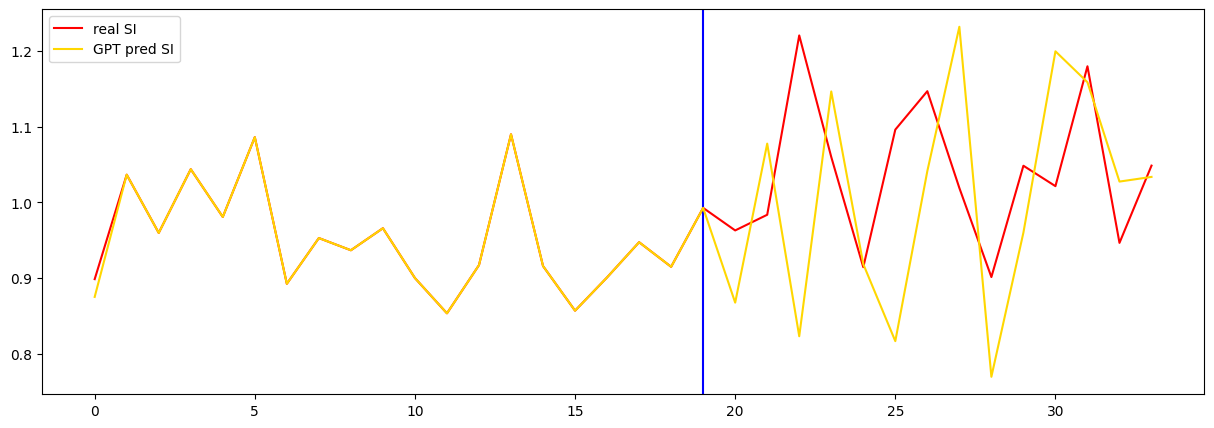

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  23.094215393066406
seq length of pred =  30
500 train loss =  22.097978591918945
seq length of pred =  30
1000 train loss =  22.044485092163086
seq length of pred =  30
1500 train loss =  22.895078659057617
seq length of pred =  30
2000 train loss =  23.38611602783203
seq length of pred =  30
2500 train loss =  21.543270111083984
seq length of pred =  30


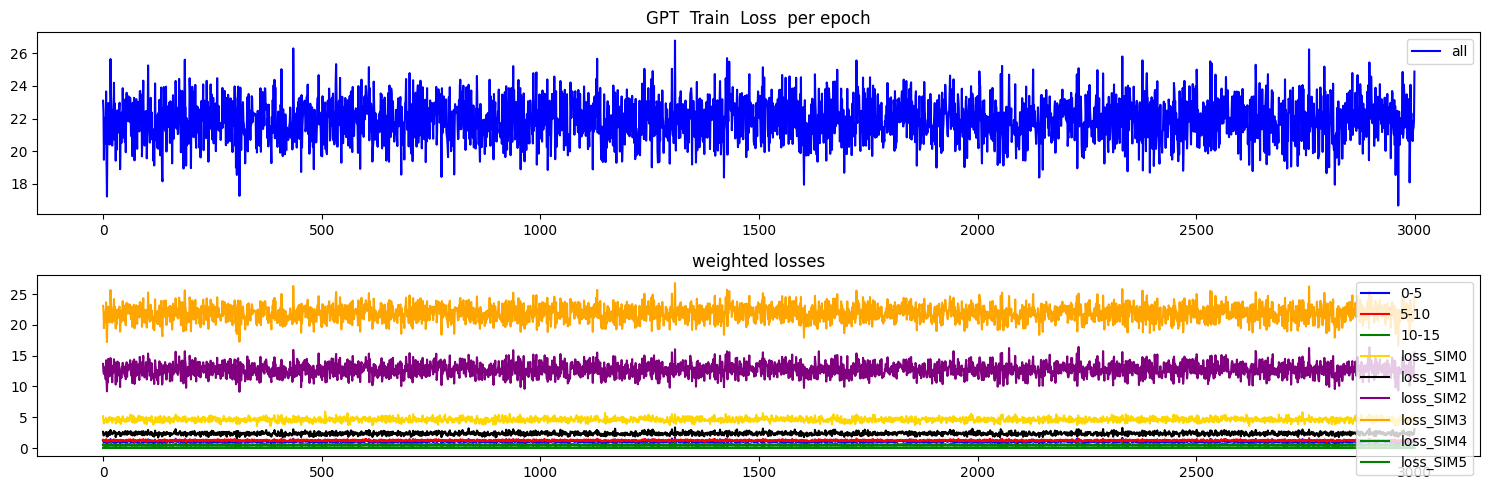

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.024982862174510956
Test MSE Loss - SI only 0-5:  0.03810262680053711
Test MSE Loss - SI only 5-10:  0.03079569898545742
Test MSE Loss - SI only 10-15:  0.008459025993943214
mae, mse, rmse, mape, mspe, rse, corr
(0.13608737, 0.024982862, 0.15805969, 1.7117839, 4.2246475, 1.3201878)
Testing R**2 - SI only:  -0.7428961842550437
Testing R**2 - SI only:  -0.7428961842550437
Testing R**2 - All features:  0.9674646930150467
Testing R**2 - (f2) - SI full:  -0.8446095328959042


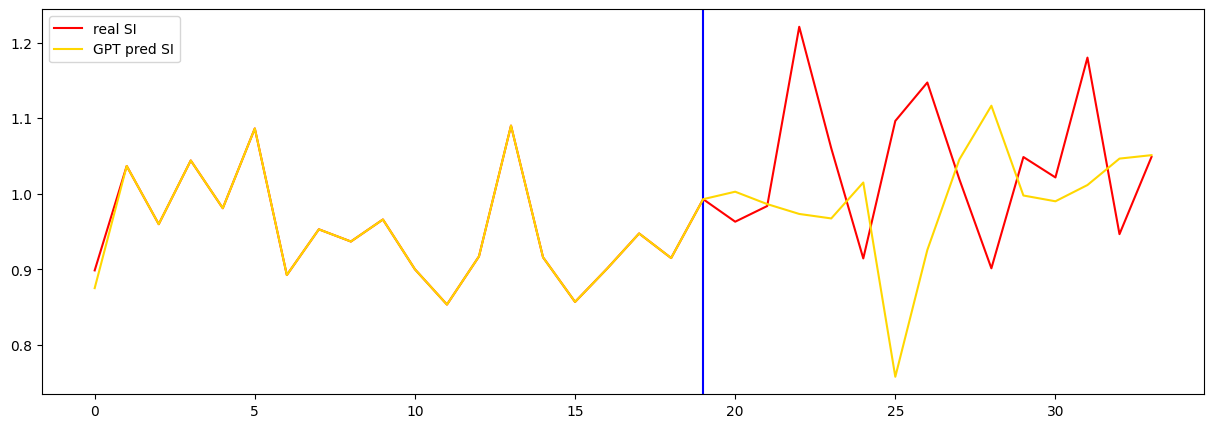

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.235143661499023
seq length of pred =  30
500 train loss =  22.77769660949707
seq length of pred =  30
1000 train loss =  21.45342445373535
seq length of pred =  30
1500 train loss =  23.67961311340332
seq length of pred =  30
2000 train loss =  22.80528450012207
seq length of pred =  30
2500 train loss =  24.410436630249023
seq length of pred =  30


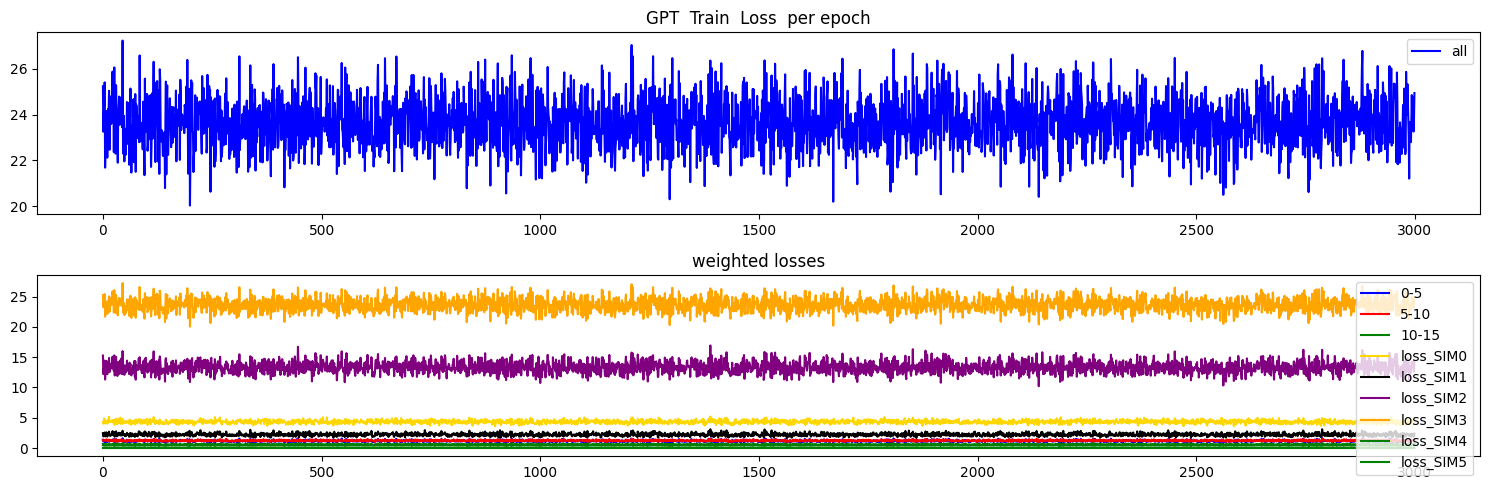

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03085116483271122
Test MSE Loss - SI only 0-5:  0.03810262680053711
Test MSE Loss - SI only 5-10:  0.03079569898545742
Test MSE Loss - SI only 10-15:  0.008459025993943214
mae, mse, rmse, mape, mspe, rse, corr
(0.14607908, 0.030851169, 0.17564501, 1.7672805, 5.0048366, 1.4670687)
Testing R**2 - SI only:  -1.152290720630703
Testing R**2 - SI only:  -1.152290720630703
Testing R**2 - All features:  0.9723277616056812
Testing R**2 - (f2) - SI full:  -1.5590042677618592


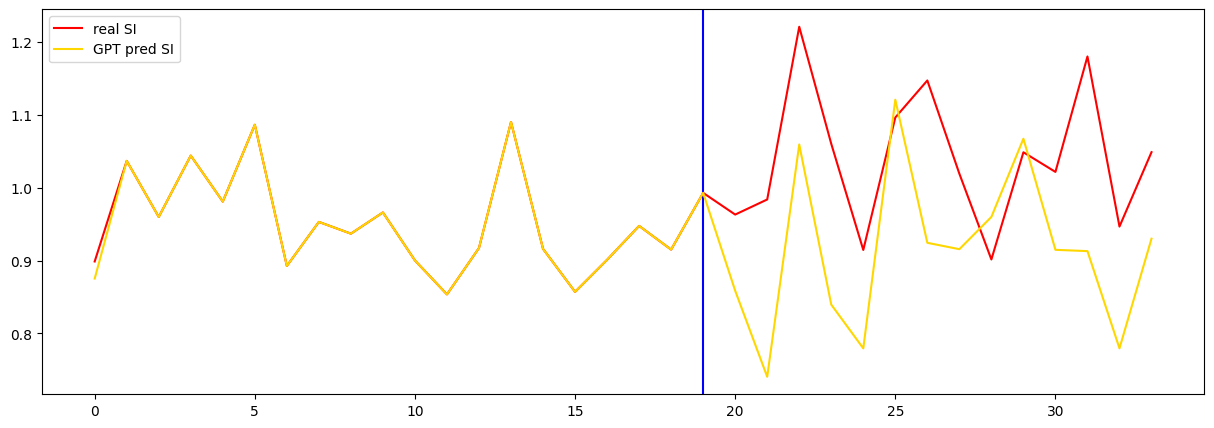

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  29.504589080810547
seq length of pred =  30
500 train loss =  28.305721282958984
seq length of pred =  30
1000 train loss =  27.30435562133789
seq length of pred =  30
1500 train loss =  28.94739532470703
seq length of pred =  30
2000 train loss =  28.39894676208496
seq length of pred =  30
2500 train loss =  27.553144454956055
seq length of pred =  30


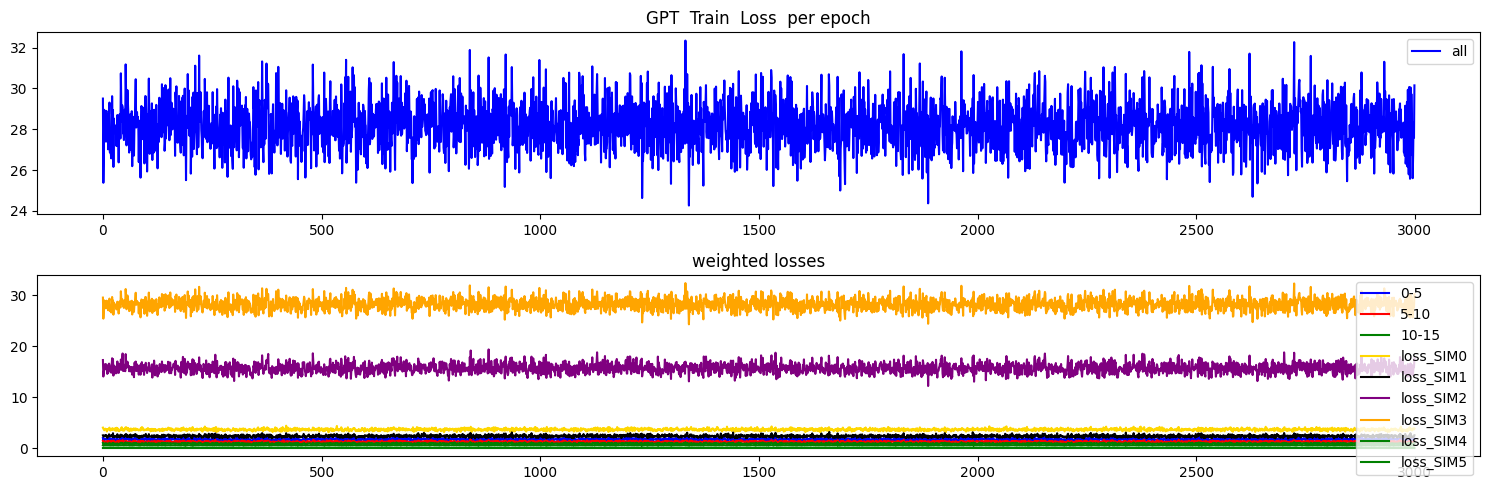

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.031721487641334534
Test MSE Loss - SI only 0-5:  0.03810262680053711
Test MSE Loss - SI only 5-10:  0.03079569898545742
Test MSE Loss - SI only 10-15:  0.008459025993943214
mae, mse, rmse, mape, mspe, rse, corr
(0.1484529, 0.03172149, 0.17810528, 1.7329248, 4.12418, 1.4876181)
Testing R**2 - SI only:  -1.2130075748616669
Testing R**2 - SI only:  -1.2130075748616669
Testing R**2 - All features:  0.9814929744461499
Testing R**2 - (f2) - SI full:  -3.1027418235201463


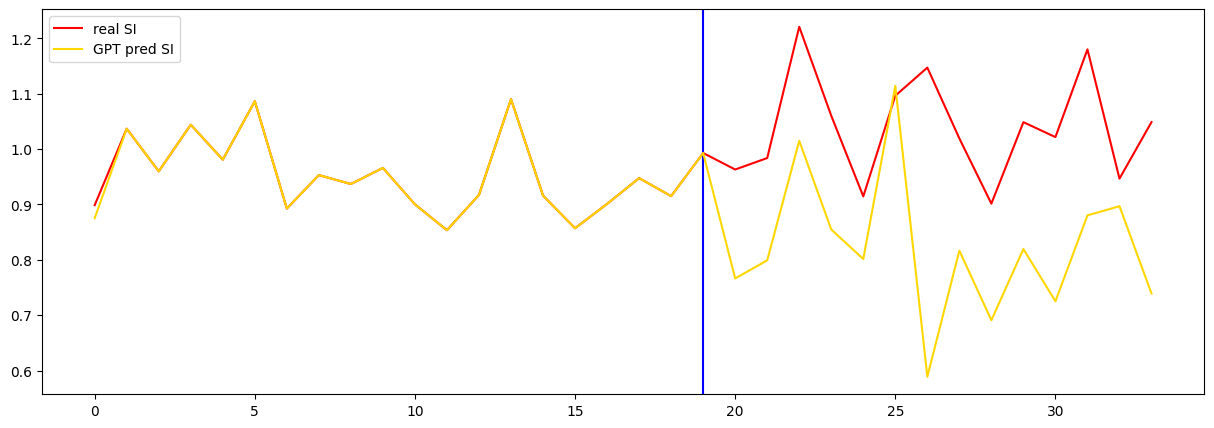

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [31]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  21.316144943237305
seq length of pred =  30
500 train loss =  22.863195419311523
seq length of pred =  30
1000 train loss =  23.84917640686035
seq length of pred =  30
1500 train loss =  21.89743995666504
seq length of pred =  30
2000 train loss =  22.899703979492188
seq length of pred =  30
2500 train loss =  22.985754013061523
seq length of pred =  30


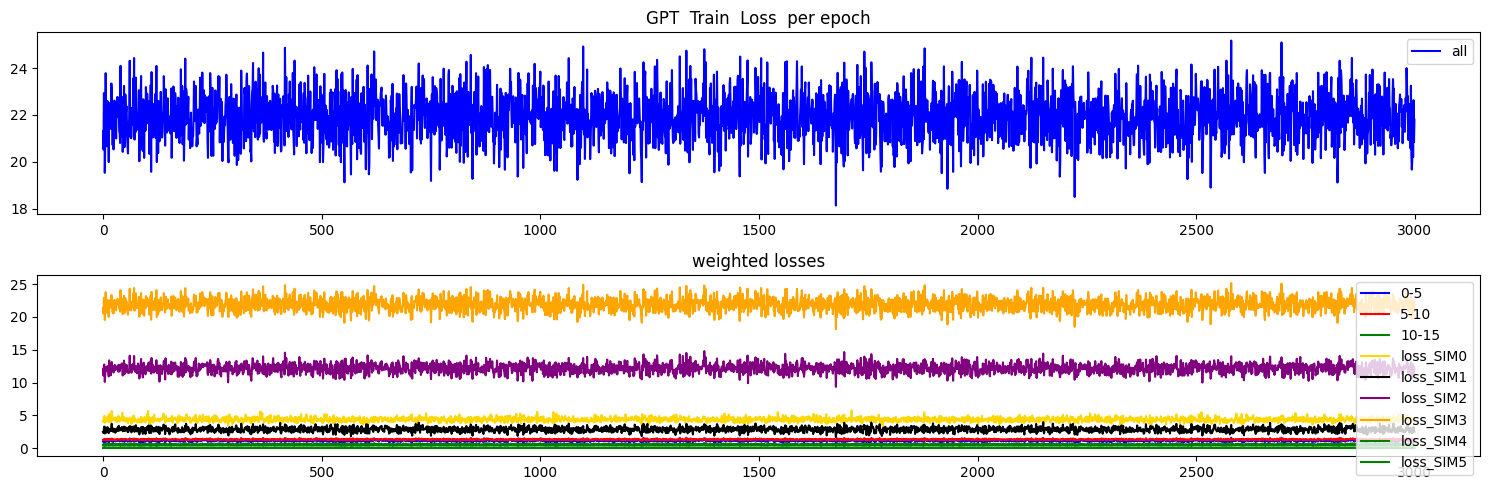

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0589272566139698
Test MSE Loss - SI only 0-5:  0.06346426159143448
Test MSE Loss - SI only 5-10:  0.09797421097755432
Test MSE Loss - SI only 10-15:  0.11683835834264755
mae, mse, rmse, mape, mspe, rse, corr
(0.19738564, 0.058927257, 0.24274936, 14.860874, 5161.5786, 1.6184405)
Testing R**2 - SI only:  -1.6193497571642914
Testing R**2 - SI only:  -1.6193497571642914
Testing R**2 - All features:  0.9582259625907266
Testing R**2 - (f2) - SI full:  -1.3191039395021233


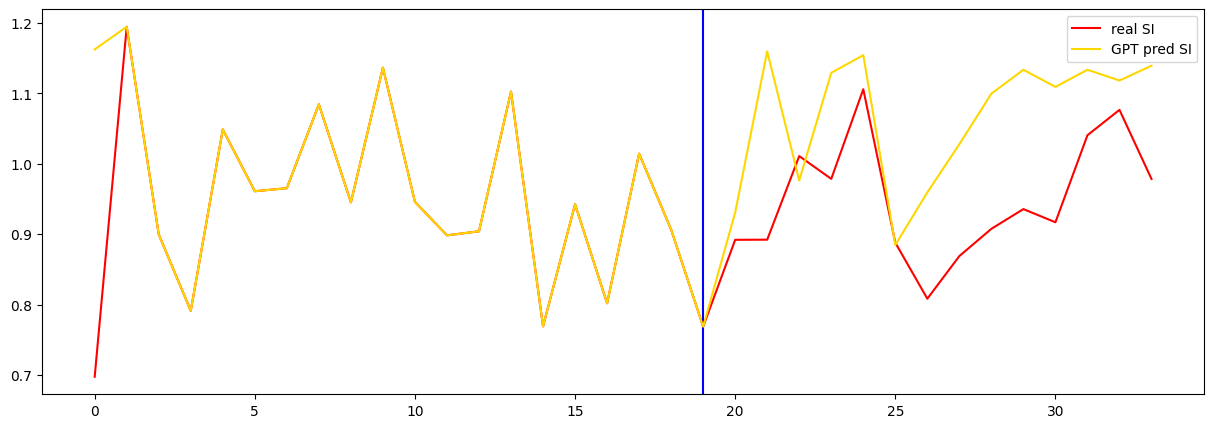

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  27.68991470336914
seq length of pred =  30
500 train loss =  27.821853637695312
seq length of pred =  30
1000 train loss =  27.22068977355957
seq length of pred =  30
1500 train loss =  27.385709762573242
seq length of pred =  30
2000 train loss =  30.340795516967773
seq length of pred =  30
2500 train loss =  25.118440628051758
seq length of pred =  30


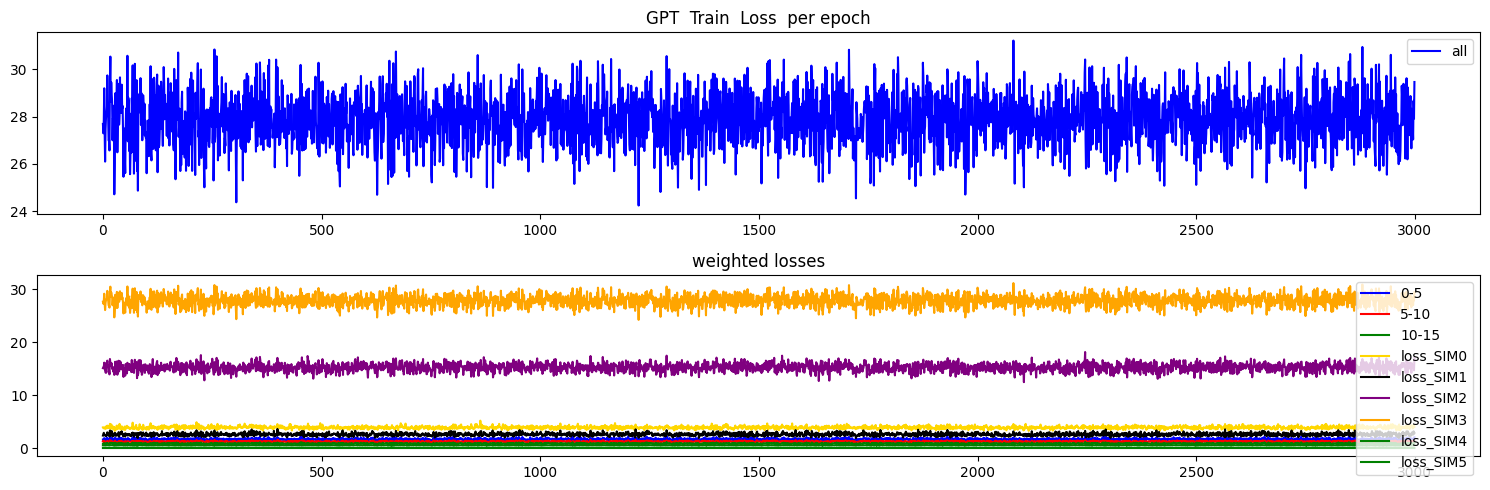

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06799397617578506
Test MSE Loss - SI only 0-5:  0.06346426159143448
Test MSE Loss - SI only 5-10:  0.09797421097755432
Test MSE Loss - SI only 10-15:  0.11683835834264755
mae, mse, rmse, mape, mspe, rse, corr
(0.22205709, 0.06799397, 0.26075652, 14.059552, 4279.937, 1.7384965)
Testing R**2 - SI only:  -2.022370599897553
Testing R**2 - SI only:  -2.022370599897553
Testing R**2 - All features:  0.9832984489983064
Testing R**2 - (f2) - SI full:  -1.3681610040848442


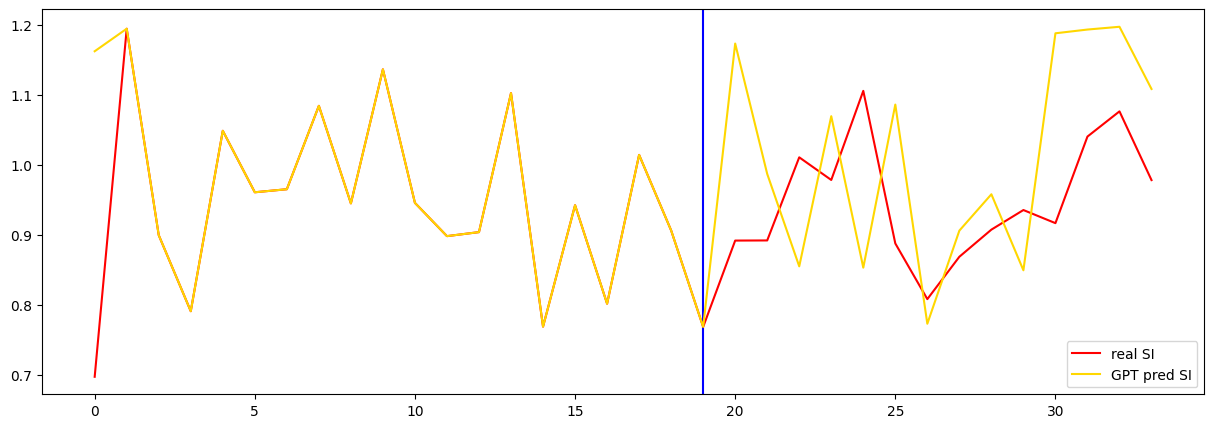

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  25.026233673095703
seq length of pred =  30
500 train loss =  25.475780487060547
seq length of pred =  30
1000 train loss =  25.99596405029297
seq length of pred =  30
1500 train loss =  26.659934997558594
seq length of pred =  30
2000 train loss =  26.615407943725586
seq length of pred =  30
2500 train loss =  27.4520206451416
seq length of pred =  30


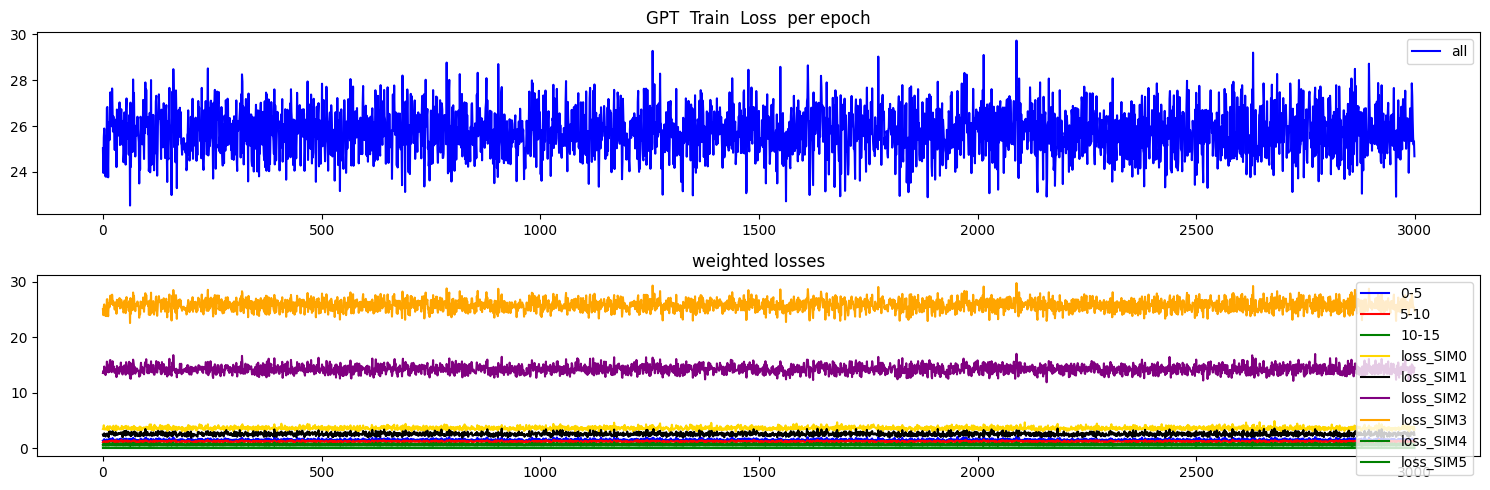

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06597017496824265
Test MSE Loss - SI only 0-5:  0.06346426159143448
Test MSE Loss - SI only 5-10:  0.09797421097755432
Test MSE Loss - SI only 10-15:  0.11683835834264755
mae, mse, rmse, mape, mspe, rse, corr
(0.21645492, 0.065970175, 0.2568466, 14.135434, 4421.6294, 1.7124286)
Testing R**2 - SI only:  -1.9324113443562445
Testing R**2 - SI only:  -1.9324113443562445
Testing R**2 - All features:  0.9875784868663274
Testing R**2 - (f2) - SI full:  -1.2801305234393627


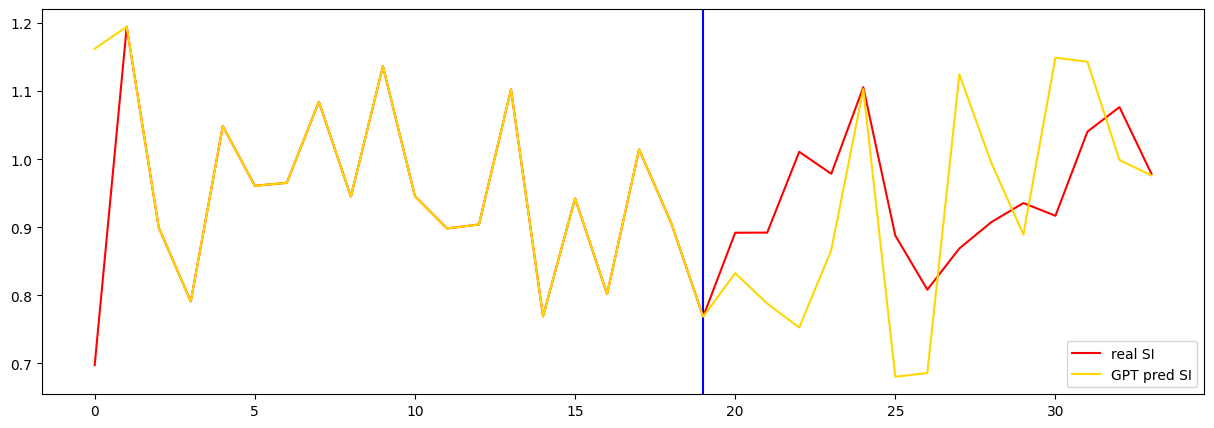

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  31.103797912597656
seq length of pred =  30
500 train loss =  29.376169204711914
seq length of pred =  30
1000 train loss =  30.221145629882812
seq length of pred =  30
1500 train loss =  29.482458114624023
seq length of pred =  30
2000 train loss =  30.02251434326172
seq length of pred =  30
2500 train loss =  29.022077560424805
seq length of pred =  30


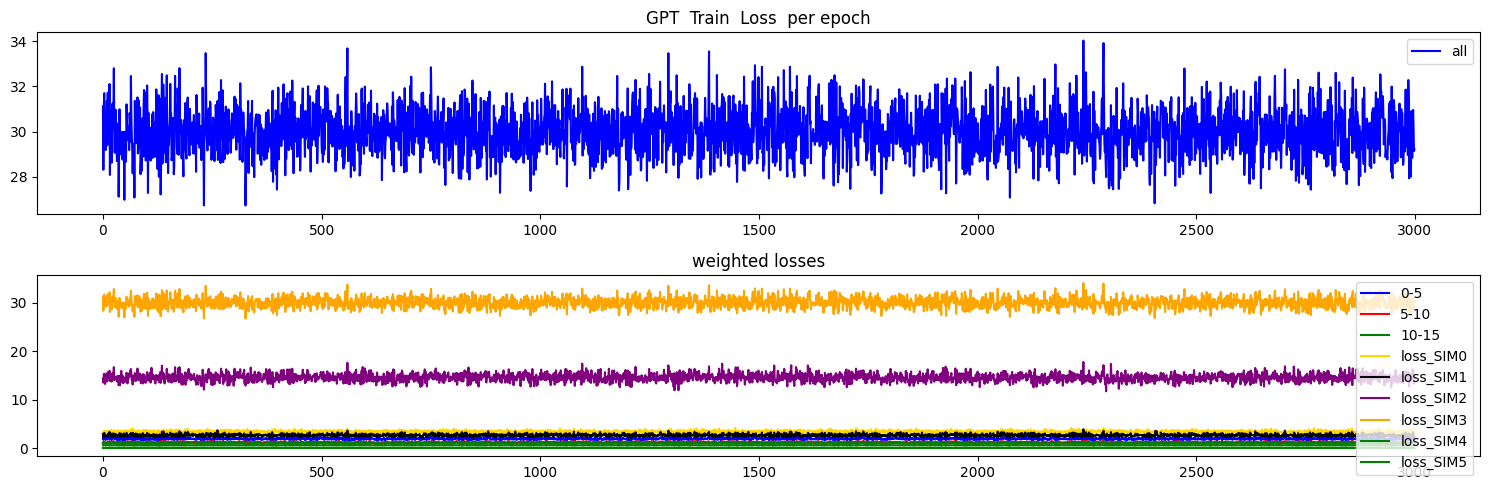

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06169000267982483
Test MSE Loss - SI only 0-5:  0.06346426159143448
Test MSE Loss - SI only 5-10:  0.09797421097755432
Test MSE Loss - SI only 10-15:  0.11683835834264755
mae, mse, rmse, mape, mspe, rse, corr
(0.19996177, 0.061690003, 0.24837472, 8.392618, 1249.045, 1.6559454)
Testing R**2 - SI only:  -1.7421552073846671
Testing R**2 - SI only:  -1.7421552073846671
Testing R**2 - All features:  0.9837975545584953
Testing R**2 - (f2) - SI full:  -2.208422074341013


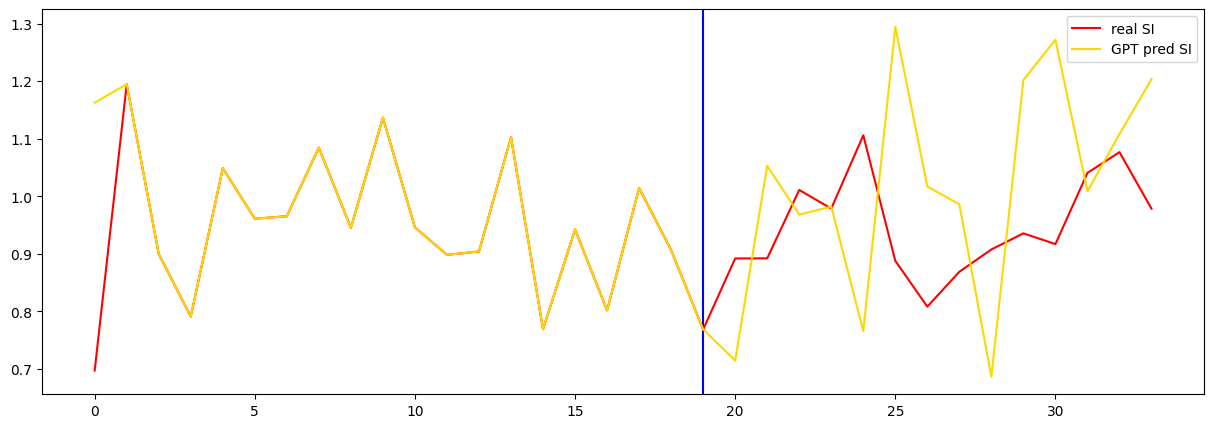

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  28.65277671813965
seq length of pred =  30
500 train loss =  29.297208786010742
seq length of pred =  30
1000 train loss =  27.638471603393555
seq length of pred =  30
1500 train loss =  29.250751495361328
seq length of pred =  30
2000 train loss =  30.236024856567383
seq length of pred =  30
2500 train loss =  29.04181480407715
seq length of pred =  30


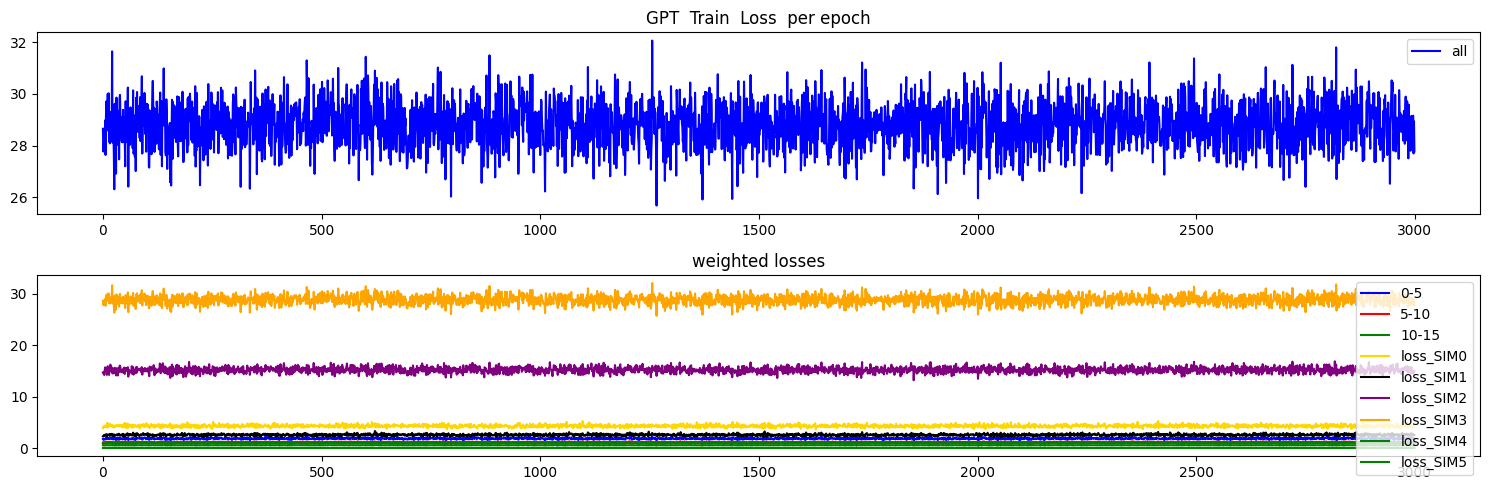

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.029899874702095985
Test MSE Loss - SI only 0-5:  0.05840558931231499
Test MSE Loss - SI only 5-10:  0.002055402146652341
Test MSE Loss - SI only 10-15:  0.06733701378107071
mae, mse, rmse, mape, mspe, rse, corr
(0.13052386, 0.029899867, 0.17291579, 2.6761892, 27.891602, 1.2757703)
Testing R**2 - SI only:  -0.6275899604631094
Testing R**2 - SI only:  -0.6275899604631094
Testing R**2 - All features:  0.8611393805272867
Testing R**2 - (f2) - SI full:  -0.18017675432670188


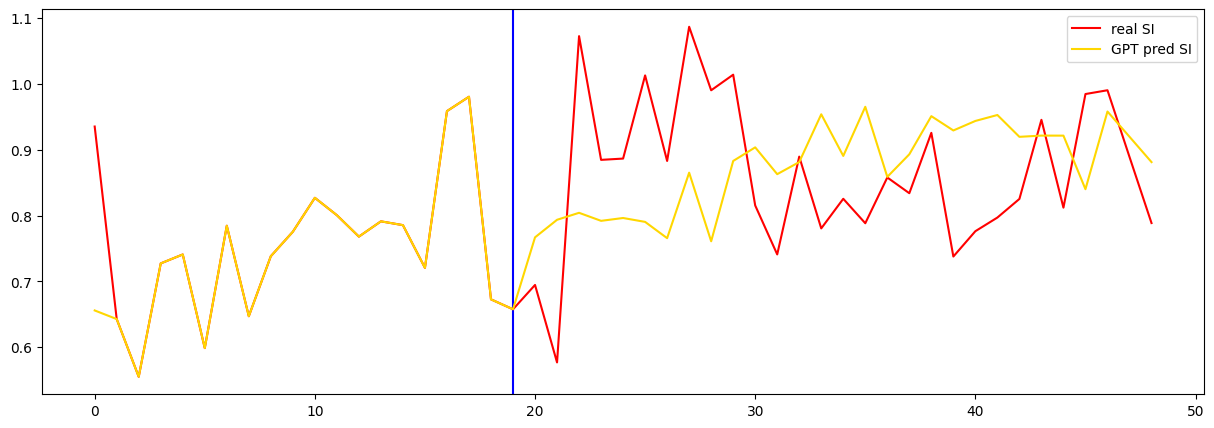

In [36]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  30.101741790771484
seq length of pred =  30
500 train loss =  29.303544998168945
seq length of pred =  30
1000 train loss =  30.62337303161621
seq length of pred =  30
1500 train loss =  29.749357223510742
seq length of pred =  30
2000 train loss =  30.15241050720215
seq length of pred =  30
2500 train loss =  30.662750244140625
seq length of pred =  30


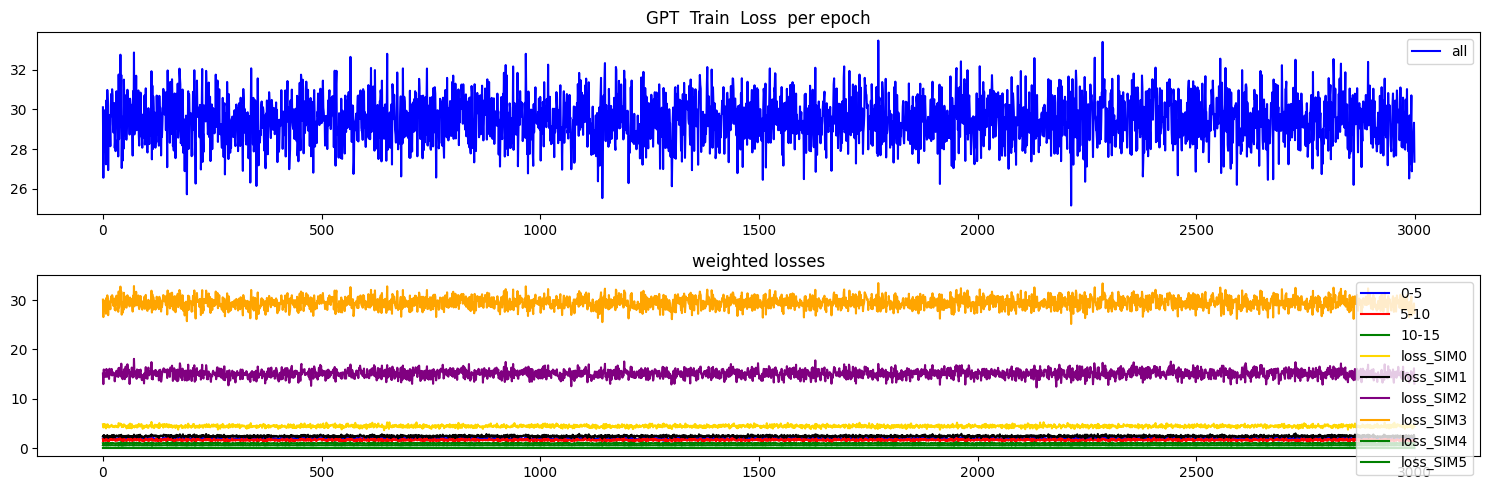

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05326332524418831
Test MSE Loss - SI only 0-5:  0.025215178728103638
Test MSE Loss - SI only 5-10:  0.1029382199048996
Test MSE Loss - SI only 10-15:  0.008379129692912102
mae, mse, rmse, mape, mspe, rse, corr
(0.18053569, 0.053263325, 0.23078848, 9.659573, 2208.4482, 1.2533042)
Testing R**2 - SI only:  -0.5707715085695793
Testing R**2 - SI only:  -0.5707715085695793
Testing R**2 - All features:  0.9934042790505786
Testing R**2 - (f2) - SI full:  -0.04675138706545945


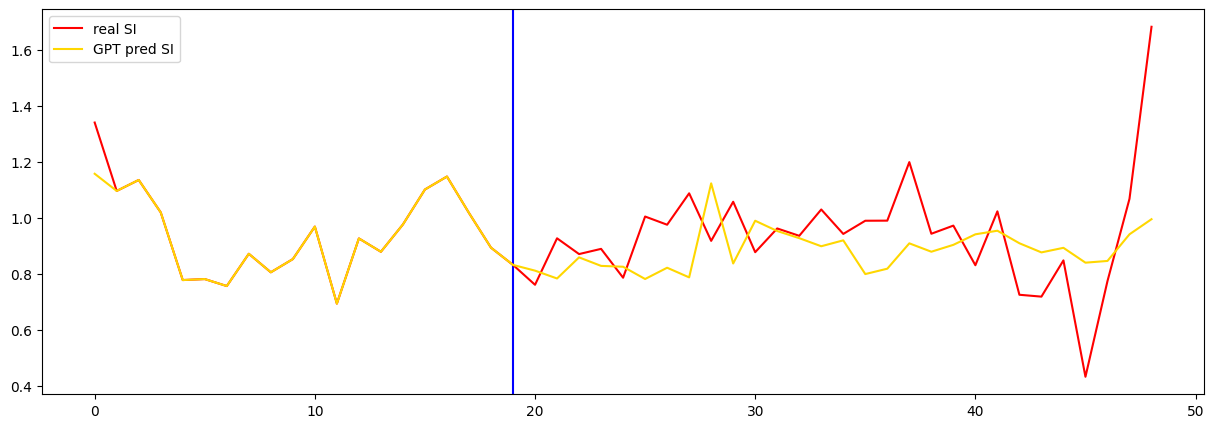

In [37]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [38]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99


0 train loss =  28.06596565246582
seq length of pred =  30
500 train loss =  27.297012329101562
seq length of pred =  30
1000 train loss =  28.1365966796875
seq length of pred =  30
1500 train loss =  27.54975128173828
seq length of pred =  30
2000 train loss =  27.7334041595459
seq length of pred =  30
2500 train loss =  27.967723846435547
seq length of pred =  30


max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.02627025730907917
Test MSE Loss - SI only 0-5:  0.017530914396047592
Test MSE Loss - SI only 5-10:  0.022018807008862495
Test MSE Loss - SI only 10-15:  0.0636688619852066
mae, mse, rmse, mape, mspe, rse, corr
(0.132191, 0.026270257, 0.16208102, 2.3908477, 22.06013, 1.2804887)
Testing R**2 - SI only:  -0.6396515852521685
Testing R**2 - SI only:  -0.6396515852521685
Testing R**2 - All features:  0.9342340478651303
Testing R**2 - (f2) - SI full:  -0.103382577979924



## 045 to 060


0 train loss =  29.960481643676758
seq length of pred =  30
500 train loss =  32.046722412109375
seq length of pred =  30
1000 train loss =  29.569740295410156
seq length of pred =  30
1500 train loss =  29.16356086730957
seq length of pred =  30
2000 train loss =  30.806617736816406
seq length of pred =  30
2500 train loss =  28.655031204223633
seq length of pred =  30


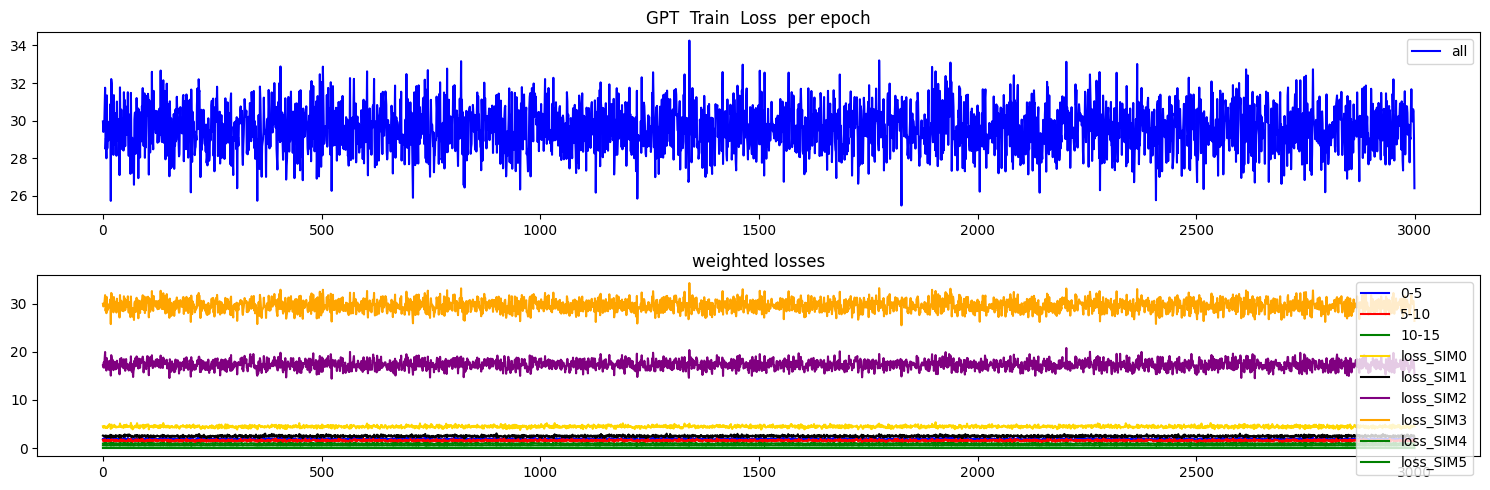

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.03367020934820175
Test MSE Loss - SI only 0-5:  0.025117630138993263
Test MSE Loss - SI only 5-10:  0.04859474301338196
Test MSE Loss - SI only 10-15:  0.01940692588686943
mae, mse, rmse, mape, mspe, rse, corr
(0.14518006, 0.033670213, 0.18349445, 39.4926, 60989.02, 1.3296399)
Testing R**2 - SI only:  -0.7679420462985103
Testing R**2 - SI only:  -0.7679420462985103
Testing R**2 - All features:  0.9978628405612859
Testing R**2 - (f2) - SI full:  -0.1373669378304656


In [39]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  21.805219650268555
seq length of pred =  30
500 train loss =  22.14636993408203
seq length of pred =  30
1000 train loss =  23.190509796142578
seq length of pred =  30
1500 train loss =  23.129058837890625
seq length of pred =  30
2000 train loss =  22.075071334838867
seq length of pred =  30
2500 train loss =  21.730684280395508
seq length of pred =  30


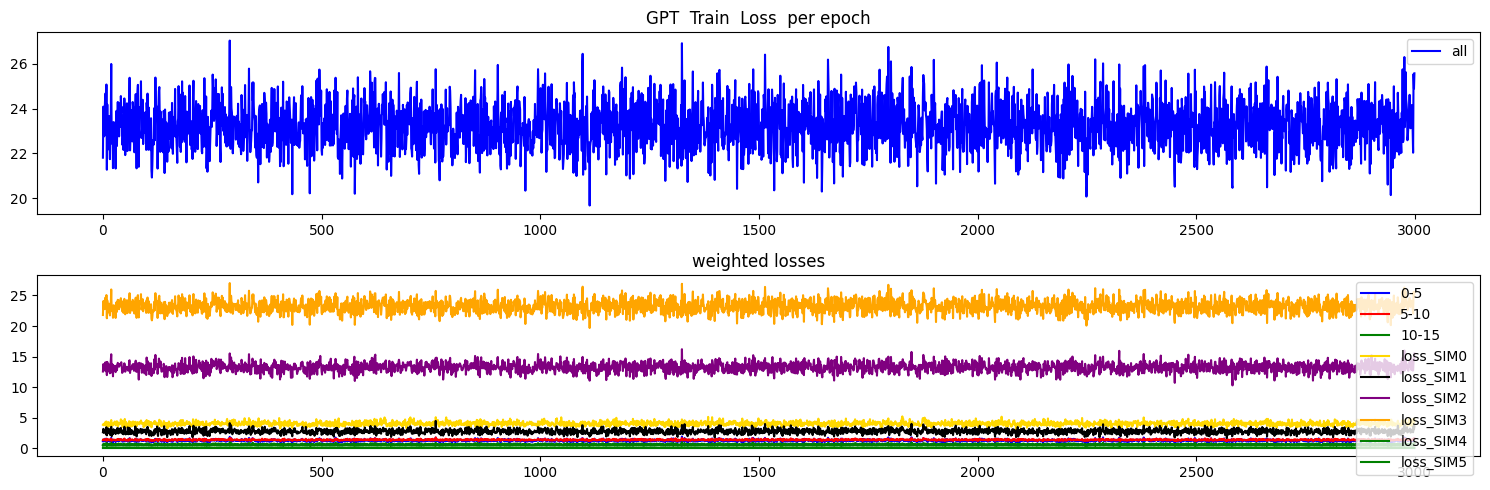

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04508962854743004
Test MSE Loss - SI only 0-5:  0.03467342257499695
Test MSE Loss - SI only 5-10:  0.03627777844667435
Test MSE Loss - SI only 10-15:  0.07530568540096283
mae, mse, rmse, mape, mspe, rse, corr
(0.17277728, 0.04508963, 0.21234319, 3.075901, 61.409016, 1.2329743)
Testing R**2 - SI only:  -0.5202257985786969
Testing R**2 - SI only:  -0.5202257985786969
Testing R**2 - All features:  0.88238589190932
Testing R**2 - (f2) - SI full:  0.20056203542047546


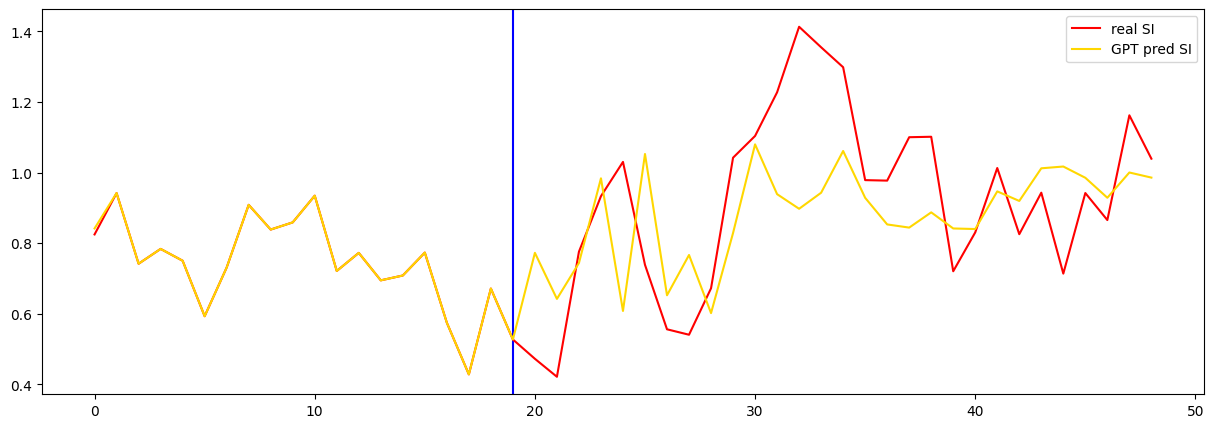

In [40]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  27.389192581176758
seq length of pred =  30
500 train loss =  25.975313186645508
seq length of pred =  30
1000 train loss =  25.871261596679688
seq length of pred =  30
1500 train loss =  27.25895118713379
seq length of pred =  30
2000 train loss =  28.774545669555664
seq length of pred =  30
2500 train loss =  27.805828094482422
seq length of pred =  30


max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.02150687202811241
Test MSE Loss - SI only 0-5:  0.022722825407981873
Test MSE Loss - SI only 5-10:  0.021091656759381294
Test MSE Loss - SI only 10-15:  0.03450268879532814
mae, mse, rmse, mape, mspe, rse, corr
(0.12583914, 0.021506874, 0.14665222, 2.149382, 13.599043, 1.2905354)
Testing R**2 - SI only:  -0.6654816759532705
Testing R**2 - SI only:  -0.6654816759532705
Testing R**2 - All features:  0.9919276049945551
Testing R**2 - (f2) - SI full:  -2.803495025523197


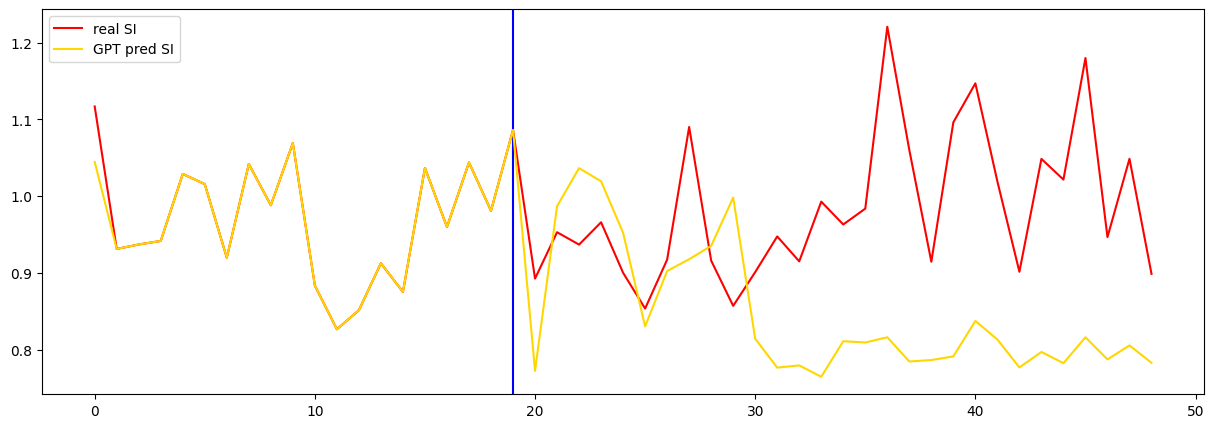

In [41]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  24.551225662231445
seq length of pred =  30
500 train loss =  24.247900009155273
seq length of pred =  30
1000 train loss =  24.376516342163086
seq length of pred =  30
1500 train loss =  24.204816818237305
seq length of pred =  30
2000 train loss =  24.678468704223633
seq length of pred =  30
2500 train loss =  25.8335018157959
seq length of pred =  30


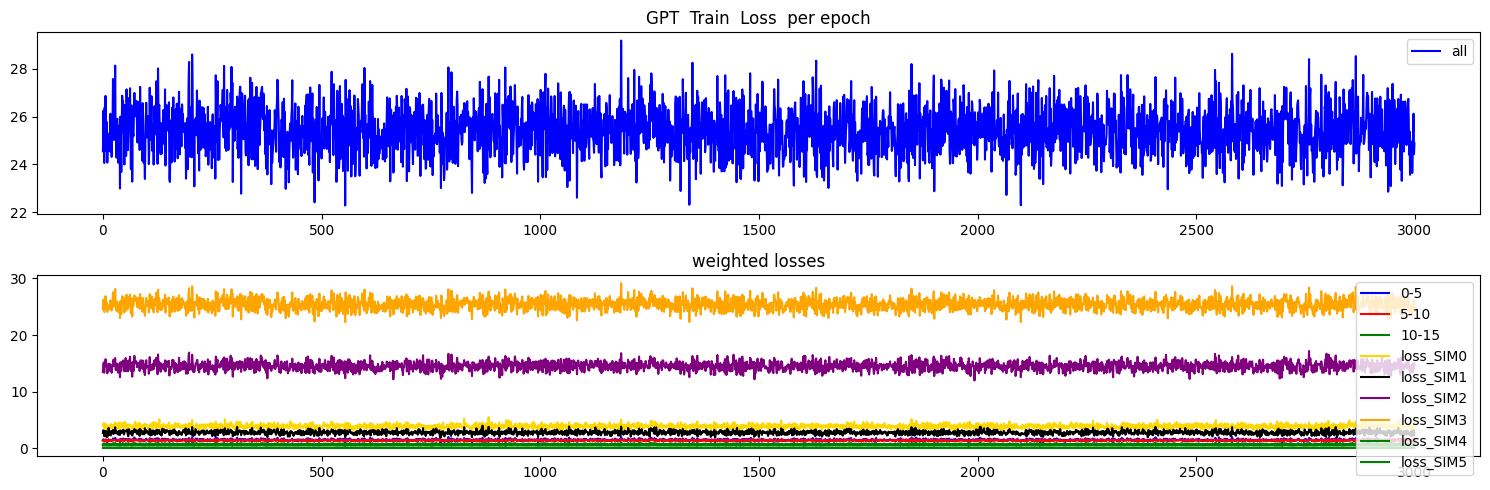

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.047641489654779434
Test MSE Loss - SI only 0-5:  0.05138545483350754
Test MSE Loss - SI only 5-10:  0.03149837628006935
Test MSE Loss - SI only 10-15:  0.03339213505387306
mae, mse, rmse, mape, mspe, rse, corr
(0.17699412, 0.04764149, 0.2182693, 3.4212568, 76.339554, 1.2550707)
Testing R**2 - SI only:  -0.5752023582172552
Testing R**2 - SI only:  -0.5752023582172552
Testing R**2 - All features:  0.9188292597200005
Testing R**2 - (f2) - SI full:  -1.7721942498912968


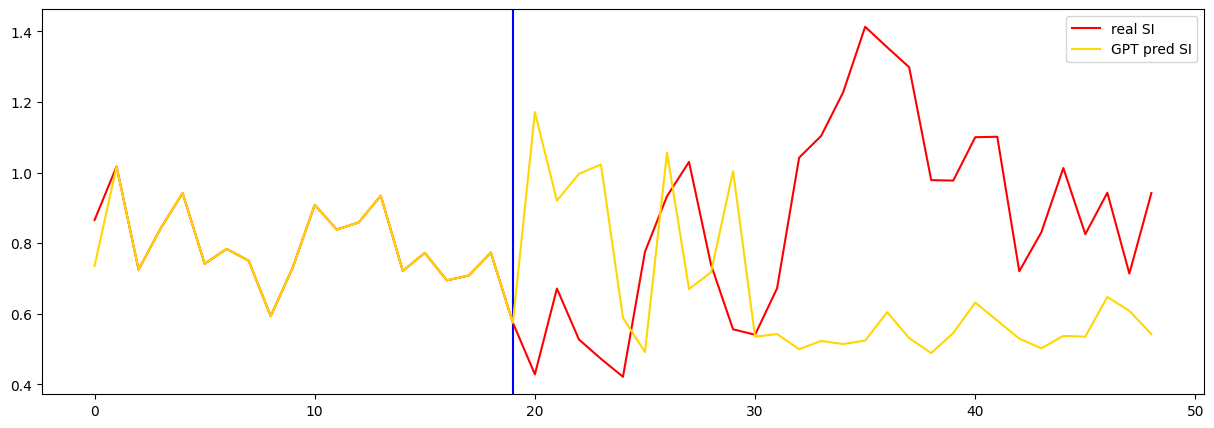

In [42]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [43]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [44]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
